In [1]:
#Libraries Imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_csv('advertising .csv')

In [3]:
AdX = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male','Clicked on Ad']]

In [4]:
AdX

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
0                       68.95   35     61833.90                256.09     0   
1                       80.23   31     68441.85                193.77     1   
2                       69.47   26     59785.94                236.50     0   
3                       74.15   29     54806.18                245.89     1   
4                       68.37   35     73889.99                225.58     0   
..                        ...  ...          ...                   ...   ...   
995                     72.97   30     71384.57                208.58     1   
996                     51.30   45     67782.17                134.42     1   
997                     51.63   51     42415.72                120.37     1   
998                     55.55   19     41920.79                187.95     0   
999                     45.01   26     29875.80                178.35     0   

     Clicked on Ad  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  
995              1  
996              1  
997              1  
998              0  
999              1  

[1000 rows x 6 columns]

**Check the head of ad_data**

In [5]:
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

** Use info and describe() on ad_data**

In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad_data.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

Text(0.5, 0, 'Age')

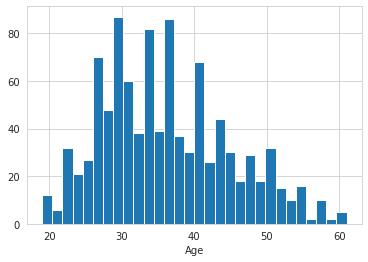

In [8]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

<AxesSubplot:xlabel='Male', ylabel='count'>

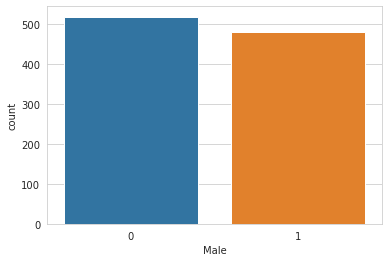

In [9]:
sns.countplot(x='Male',data=ad_data)

**Create a jointplot showing Area Income versus Age.**

<AxesSubplot:xlabel='Male', ylabel='count'>

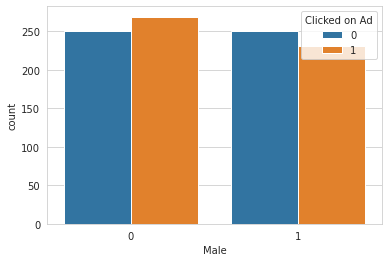

In [10]:
sns.countplot(x='Male',data=ad_data,hue='Clicked on Ad')

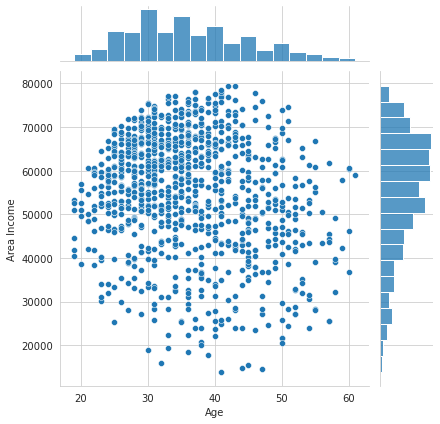

In [11]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

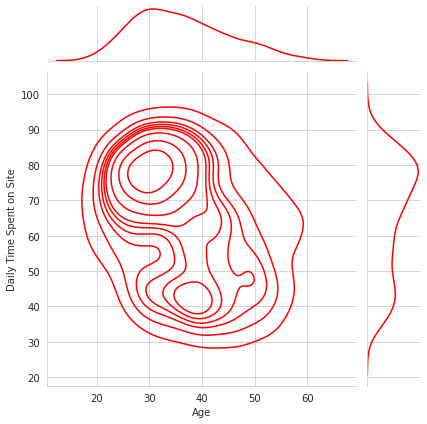

In [12]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde');

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

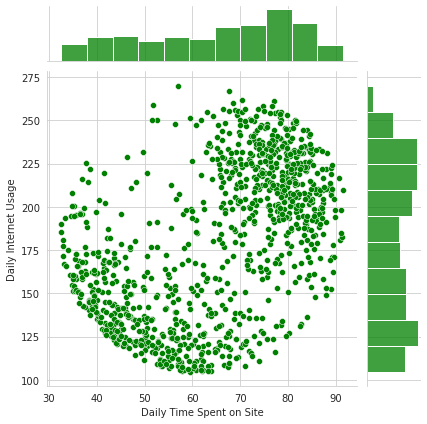

In [13]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

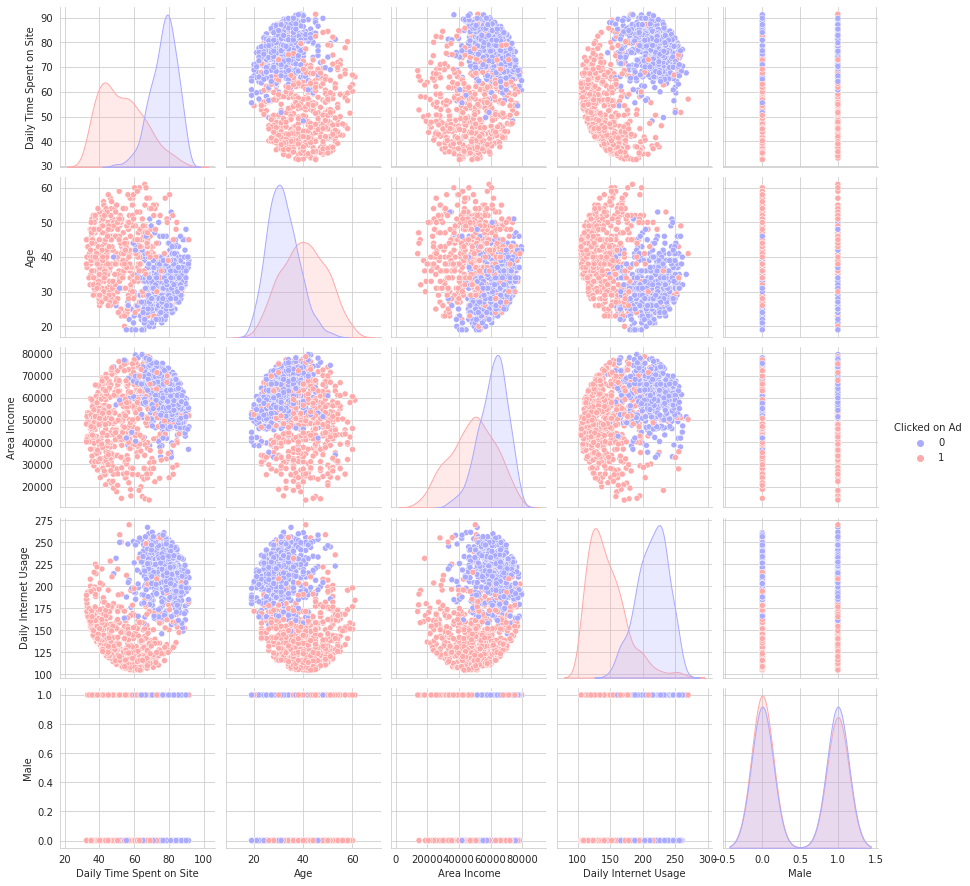

In [14]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')

<AxesSubplot:>

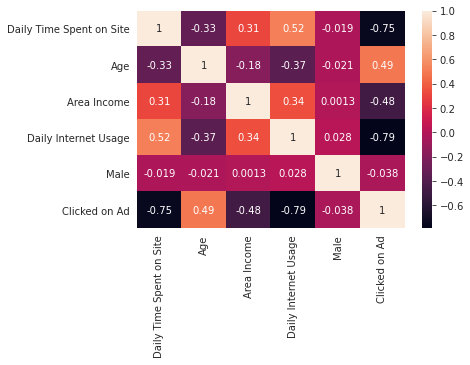

In [15]:
corr=AdX.iloc[:,:].corr() 
columns=corr.columns 
sns.heatmap(corr,annot=True)

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#Data Preprocessing
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

** Train and fit a logistic regression model on the training set.**

In [19]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations
** Now predict values for the testing data.**

In [22]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       136
           1       0.99      0.96      0.98       114

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

[[135   1]
 [  4 110]]


0.98

In [26]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
  
# Instantiating RandomizedSearchCV object 
log_cv = RandomizedSearchCV(logmodel,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
log_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(log_cv.best_params_)) 
print("Best score is {}".format(log_cv.best_score_)) 

Tuned Logistic Regression Parameters: {'penalty': 'l2', 'C': 10}
Best score is 0.9653333333333333


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.964             nan        nan        nan
        nan 0.96533333 0.96533333        nan]
  warnings.warn(


In [27]:
#Hyperparameter tuning with GridSearch CV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
grid_search = GridSearchCV(estimator = logmodel,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 96.53 %
Best Parameters: {'C': 1, 'penalty': 'l2'}


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.96266667        nan 0.964             nan 0.964
        nan 0.96533333        nan 0.96533333        nan 0.964
        nan 0.964     ]
  warnings.warn(


In [28]:
#K-Cross Validation #Updated Logistic Regression with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logmodel, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.53 %
Standard Deviation: 1.48 %


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       136
           1       0.99      0.96      0.98       114

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [30]:
#KNN Approach

In [31]:
#Data Preprocessing
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier1.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = classifier1.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
print(cm)
accuracy_score(y_test, y_pred1)

[[136   0]
 [  8 106]]


0.968

In [36]:
# calculating the accuracy of models with different values of k

In [37]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(100)
for i in range(1,101):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = accuracy_score(y_test, yhat)

mean_acc

array([0.948, 0.96 , 0.968, 0.968, 0.968, 0.964, 0.968, 0.968, 0.968,
       0.964, 0.972, 0.972, 0.972, 0.972, 0.972, 0.968, 0.968, 0.968,
       0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.972,
       0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.968, 0.972, 0.972,
       0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972, 0.972,
       0.972, 0.972, 0.972, 0.972, 0.968, 0.972, 0.968, 0.968, 0.968,
       0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.968,
       0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.968,
       0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.968,
       0.968, 0.968, 0.968, 0.968, 0.968, 0.968, 0.964, 0.968, 0.964,
       0.964, 0.964, 0.964, 0.964, 0.964, 0.964, 0.964, 0.964, 0.964,
       0.964])

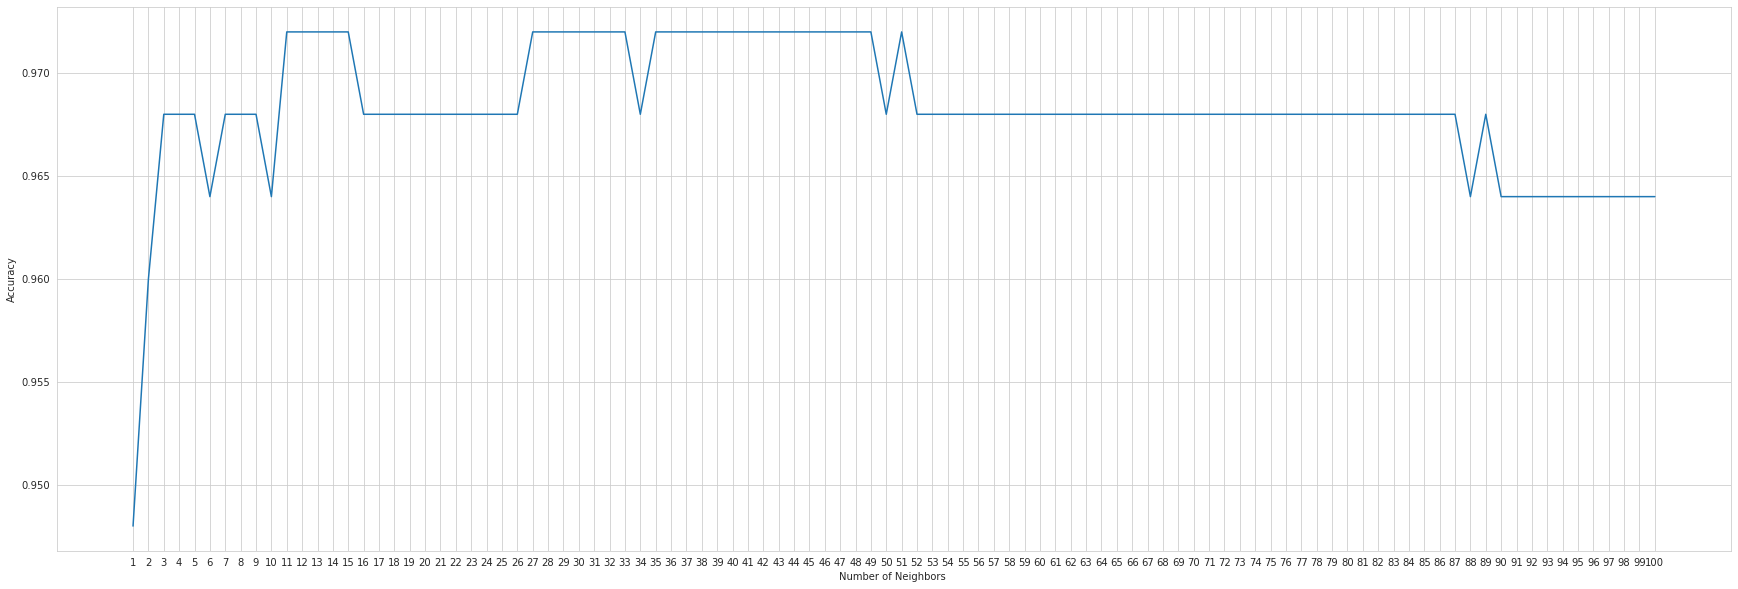

In [38]:
loc = np.arange(1,101,step=1.0)
plt.figure(figsize = (30, 10))
plt.plot(range(1,101), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [39]:
#Hyperparameter Tuning

In [40]:
#List Hyperparameters that we want to tune.
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
grid_params = {'n_neighbors' : [11,12,13,14,15,27,28,30,50],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'leaf_size' : list(range(1,50)),
               'p' : [1,2]}
  
  
# Instantiating RandomizedSearchCV object 
knn_cv = RandomizedSearchCV(classifier1,grid_params, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
knn_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned KNN Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_)) 


Tuned KNN Parameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 11, 'metric': 'euclidean', 'leaf_size': 26}
Best score is 0.9639999999999999


In [41]:
#Hyperparameter tuning with Grid Search CV
from sklearn.model_selection import GridSearchCV 
  
# Creating the hyperparameter grid  
grid_params = {'n_neighbors' : [11,12,13,14,15,27,28,30,50],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'leaf_size' : list(range(1,50)),
               'p' : [1,2]}

grid_search_knn = GridSearchCV(estimator = classifier1,
                           param_grid = grid_params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search_knn.fit(X_train, y_train)
best_accuracy_1 = grid_search_knn.best_score_
best_parameters_1 = grid_search_knn.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_1*100))
print("Best Parameters:", best_parameters_1)

Best Accuracy: 96.40 %
Best Parameters: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}


In [42]:
classifier1_new = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2,leaf_size=1)
classifier1_new.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=11)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1_new = classifier1_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred1_new)
print(cm)
accuracy_score(y_test, y_pred1_new)

[[136   0]
 [  7 107]]


0.972

In [44]:
#K-Cross Validation #Updated KNN with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier1_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))

Accuracy: 96.27 %
Standard Deviation: 1.55 %


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1_new))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       136
           1       1.00      0.94      0.97       114

    accuracy                           0.97       250
   macro avg       0.98      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [46]:
#SVM Approach

In [47]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[135   1]
 [  4 110]]


0.98

In [52]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist2 = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear'],'degree':[1,2,3,4]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'degree':[1,2,3,4]}]
  
# Instantiating RandomizedSearchCV object 
tree_cv2 = RandomizedSearchCV(classifier2,param_dist2, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv2.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned SVC Parameters: {}".format(tree_cv2.best_params_)) 
print("Best score is {}".format(tree_cv2.best_score_)) 

Tuned SVC Parameters: {'kernel': 'linear', 'degree': 2, 'C': 0.75}
Best score is 0.9666666666666666


In [53]:
#Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
parameters2 = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear'],'degree':[1,2,3,4]},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],'degree':[1,2,3,4]}]
grid_search2 = GridSearchCV(estimator = classifier2,
                           param_grid = parameters2,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search2.fit(X_train, y_train)
best_accuracy1 = grid_search2.best_score_
best_parameters2 = grid_search2.best_params_
print("Best r2_score: {:.2f} %".format(best_accuracy1*100))
print("Best Parameters:", best_parameters2)

Best r2_score: 96.80 %
Best Parameters: {'C': 0.25, 'degree': 1, 'kernel': 'linear'}


In [54]:
classifier2_new = SVC(kernel = 'linear',C=0.25, random_state = 0)
classifier2_new.fit(X_train, y_train)

SVC(C=0.25, kernel='linear', random_state=0)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2_new = classifier2_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred2_new)
print(cm)
accuracy_score(y_test, y_pred2_new)

[[135   1]
 [  4 110]]


0.98

In [56]:
#K-Cross Validation #Updated SVC with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies2 = cross_val_score(estimator = classifier2_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))


Accuracy: 96.80 %
Standard Deviation: 1.36 %


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2_new))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       136
           1       0.99      0.96      0.98       114

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [58]:
#Naive Bayes Approach

In [59]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

GaussianNB()

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred3 = classifier3.predict(X_test)
cm = confusion_matrix(y_test, y_pred3)
print(cm)
accuracy_score(y_test, y_pred3)

[[132   4]
 [  4 110]]


0.968

In [64]:
#K-Cross Validation #Updated Naive Bayes with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies3 = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))


Accuracy: 96.27 %
Standard Deviation: 1.31 %


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       136
           1       0.96      0.96      0.96       114

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [66]:
#There are some algorithms like Decision Tree and Ensemble Techniques
#(like AdaBoost and XGBoost) that do not require scaling 
#because splitting in these cases are based on the values
"""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
"""


'\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\n'

In [67]:
#Decision Tree Classification Approach

In [68]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [70]:
from sklearn.tree import DecisionTreeClassifier
classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4 = classifier4.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score(y_test, y_pred4)

[[130   6]
 [  4 110]]


0.96

In [72]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist4 = {"max_depth": [2, 6, 8,10,12,14], 
              "min_samples_split": [2,4,10,12,16,20,24],
              "max_features": [2,3,4,5,6],
              "min_samples_leaf": [2,4,6,8,10,12],
              "max_leaf_nodes": [10,20,40,60,80,90,100],
              "criterion": ["gini", "entropy"]} 
   
  
# Instantiating RandomizedSearchCV object 
tree_cv4 = RandomizedSearchCV(classifier4,param_dist4, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv4.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv4.best_params_)) 
print("Best score is {}".format(tree_cv4.best_score_)) 

Tuned Decision Tree Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': 10, 'max_features': 3, 'max_depth': 10, 'criterion': 'entropy'}
Best score is 0.9466666666666667


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.92933333        nan 0.936      0.928      0.92266667 0.93866667
 0.94666667 0.93333333        nan        nan]
  warnings.warn(


In [73]:
from sklearn.model_selection import GridSearchCV
param_grid4 = {"max_depth": [2, 6, 8,10,12,14], 
              "min_samples_split": [2,4,10,12,16,20,24],
              "max_features": [2,3,4,5,6],
              "min_samples_leaf": [2,4,6,8,10,12],
              "max_leaf_nodes": [10,20,40,60,80,90,100],
              "criterion": ["gini", "entropy"]} 
  
grid_search4 = GridSearchCV(estimator = classifier4,
                           param_grid = param_grid4,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search4.fit(X_train, y_train)
best_accuracy_score4 = grid_search4.best_score_
best_parameters4 = grid_search4.best_params_
print("Best Accuracy_score: {:.2f} %".format(best_accuracy_score4*100))
print("Best Parameters:", best_parameters4)

Best Accuracy_score: 95.20 %
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 12}


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.868 0.868 0.868 ...   nan   nan   nan]
  warnings.warn(


In [74]:
classifier4_new = DecisionTreeClassifier(criterion = 'gini', random_state = 0,max_depth=8,max_features=3,min_samples_leaf=2,min_samples_split=12,max_leaf_nodes=20)
classifier4_new.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_features=3, max_leaf_nodes=20,
                       min_samples_leaf=2, min_samples_split=12,
                       random_state=0)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4_new = classifier4_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred4_new)
print(cm)
accuracy_score(y_test, y_pred4_new)

[[129   7]
 [ 11 103]]


0.928

In [76]:
#K-Cross Validation #Updated Decision Tree with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies4 = cross_val_score(estimator = classifier4_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies4.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies4.std()*100))


Accuracy: 95.20 %
Standard Deviation: 1.71 %


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4_new))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       136
           1       0.94      0.90      0.92       114

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



In [78]:
#Random Forest Classifier

In [79]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [81]:
from sklearn.ensemble import RandomForestClassifier
classifier5 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier5.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5 = classifier5.predict(X_test)
cm = confusion_matrix(y_test, y_pred5)
print(cm)
accuracy_score(y_test, y_pred5)

[[132   4]
 [  4 110]]


0.968

In [83]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist5 ={"n_estimators": [20,30,50,100],
            "max_features": ['auto', 'sqrt', 'log2',5,10],
            "min_samples_split" : [2,4,6,8,10,20],
            "criterion": ["entropy", "gini"],
            "max_depth": [2, 6, 8,10,12],
            "bootstrap": [True, False]} 
  
# Instantiating RandomizedSearchCV object 
tree_cv5 = RandomizedSearchCV(classifier5,param_dist5, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv5.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Random Forest Parameters: {}".format(tree_cv5.best_params_)) 
print("Best score is {}".format(tree_cv5.best_score_)) 

/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.95866667 0.93333333 0.952      0.956
 0.93333333 0.96133333 0.93733333 0.96      ]
  warnings.warn(


Tuned Random Forest Parameters: {'n_estimators': 30, 'min_samples_split': 20, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy', 'bootstrap': True}
Best score is 0.9613333333333334


In [84]:
from sklearn.model_selection import GridSearchCV
param_grid5 = {"n_estimators": [20,30,50,100],
            "max_features": ['auto', 'sqrt', 'log2',5,10],
            "min_samples_split" : [2,4,6,8,10,20],
            "criterion": ["entropy", "gini"],
            "max_depth": [2, 6, 8,10,12],
            "bootstrap": [True, False]} 

grid_search5 = GridSearchCV(estimator = classifier5,
                           param_grid = param_grid5,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search5.fit(X_train, y_train)
best_accuracy5 = grid_search5.best_score_
best_parameters5 = grid_search5.best_params_
print("Best Accuracy_score: {:.2f} %".format(best_accuracy5*100))
print("Best Parameters:", best_parameters5)


Best Accuracy_score: 96.27 %
Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 20}


/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.944 0.948 0.952 ...   nan   nan   nan]
  warnings.warn(


In [85]:
classifier5_new = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0,max_depth=6,min_samples_split=2)
classifier5_new.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=20,
                       random_state=0)

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred5_new = classifier5_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred5_new)
print(cm)
accuracy_score(y_test, y_pred5_new)

[[131   5]
 [  6 108]]


0.956

In [87]:
#K-Cross Validation #Updated Random Forest with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies5 = cross_val_score(estimator = classifier5_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies5.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies5.std()*100))


Accuracy: 96.00 %
Standard Deviation: 2.23 %


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5_new))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       136
           1       0.96      0.95      0.95       114

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [89]:
#ADABOOST CLASSIFIER

In [90]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [91]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[132   4]
 [  4 110]]


0.968

In [93]:
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 

# Creating the hyperparameter grid
param_dist = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20,30,50,100,200],
    'learning_rate': [0.01,0.1,0.5,0.8,1],
    'algorithm': ['SAMME', 'SAMME.R']
             }
  

# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(classifier,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 

tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Adaboost Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

Tuned Adaboost Parameters: {'n_estimators': 50, 'learning_rate': 0.8, 'algorithm': 'SAMME'}
Best score is 0.952


In [94]:
tree_cv.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.8)

In [95]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20,30,50,100,200],
    'learning_rate': [0.01,0.1,0.5,0.8,1],
    'algorithm': ['SAMME', 'SAMME.R']
             }


grid_search = GridSearchCV(estimator = classifier,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy_score: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


Best Accuracy_score: 95.73 %
Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 200}


In [96]:
grid_search.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=200)

In [97]:
#No hyperparameter tuning required since we are getting better accuracy

In [98]:
#K-Cross Validation Updated Adaboost with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 94.80 %
Standard Deviation: 2.10 %


In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       136
           1       0.96      0.96      0.96       114

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [100]:
#Gradient Boosting Classifier

In [101]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[132   4]
 [  6 108]]


0.96

In [104]:
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 
param_dist = {'learning_rate':[1,0.50,0.25,0.15,0.1,0.05,0.01,0.005,0.001],
           'n_estimators':[50,100,250,500,750,1000,1500],
           'max_depth':[2,3,4,5,6,7,8,9,10,12,14,16],
           'min_samples_split':[2,4,8,10,20,40,60,100],
           'min_samples_leaf':[1,3,5,7,9,10,20],
           'max_features':[2,3,4,5,6,7,8,9,10],
           'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,0.95,1]}

# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(classifier,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 

tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned Gradient Boosting Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.95466667 0.95066667        nan
 0.94266667        nan        nan        nan]
  warnings.warn(


Tuned Gradient Boosting Parameters: {'subsample': 0.8, 'n_estimators': 750, 'min_samples_split': 60, 'min_samples_leaf': 1, 'max_features': 4, 'max_depth': 3, 'learning_rate': 0.5}
Best score is 0.9546666666666667


In [105]:
tree_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.5, max_features=4,
                           min_samples_split=60, n_estimators=750,
                           subsample=0.8)

In [106]:
#No hyperparameter tuning required since we are getting better accuracy

In [107]:
from sklearn.model_selection import cross_val_score
accuracies_new = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_new.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_new.std()*100))

Accuracy: 95.47 %
Standard Deviation: 1.48 %


In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       136
           1       0.96      0.95      0.96       114

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [109]:
#LightGBM (Light Gradient Boosting Machine)

In [110]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [111]:
import lightgbm as lgb
  
# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMClassifier
classifier = LGBMClassifier()
classifier.fit(X_train, y_train)

LGBMClassifier()

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[132   4]
 [  6 108]]


0.96

In [113]:
#Hyperparameter tuning with Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV 
param_dist = {
'max_depth':[2,3,4,5,6,7,8,10,12,14,16,18,20],
'num_leaves':[10,20,30,40,50,60,70,80],
'learning_rate': [0.01,0.02,0.04,0.05,0.1,0.2,0.5,1],
'n_estimators':[50,100,200,500,1000],
'min_data_in_leaf':[100,200,300,500,800,1000],
'colsample_bytree': [0.5,1.0],
'subsample': [0.5,1.0],
'subsample_freq':[0,1],
'feature_fraction':[0.8,1.0],
'bagging_fraction':[0.8,1.0]

}


# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(classifier,param_dist, cv = 10,scoring = "accuracy",n_jobs=-1) 

tree_cv.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned LightGBM Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_))

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=200, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=200
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
Tuned LightGBM Parameters: {'subsample_freq': 0, 'subsample': 1.0, 'num_leaves': 20, 'n_estimators': 200, 'min_data_in_leaf': 200, 'max_depth': 8, 'learning_rate': 0.1, 'feature_fraction': 0.8, 'colsample_bytree': 1.0, 'bagging_fraction': 1.0}
Best score is 0.9533333333333334


In [114]:
tree_cv.best_estimator_

LGBMClassifier(bagging_fraction=1.0, feature_fraction=0.8, max_depth=8,
               min_data_in_leaf=200, n_estimators=200, num_leaves=20)

In [115]:
#No hyperparameter tuning required since we are getting better accuracy

In [116]:
from sklearn.model_selection import cross_val_score
accuracies_new = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_new.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_new.std()*100))

Accuracy: 95.20 %
Standard Deviation: 1.60 %


In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       136
           1       0.96      0.95      0.96       114

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [118]:
#XGBoost Classification

In [119]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [120]:
from xgboost import XGBClassifier
classifier6 = XGBClassifier()
classifier6.fit(X_train, y_train)

[15:09:04] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred6 = classifier6.predict(X_test)
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[131   5]
 [  7 107]]


0.952

In [122]:
#Hyperparameter tuning with Randomized Search CV
from scipy.stats import randint 
from sklearn.model_selection import RandomizedSearchCV 
  
# Creating the hyperparameter grid  
param_dist6 = {"n_estimators": [10,30,50,100,200],
              "min_child_weight":[1,2,3,4,5,6,7],
              "gamma":[0,0.1,0.2,0.3,0.4,0.5,0.6],
              "max_depth": [3,4,5,6,7,8,9,10,12,15],
              'subsample':[i/10.0 for i in range(6,10)],
              'colsample_bytree':[i/10.0 for i in range(3,10)],
              'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
              "learning_rate":[0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]} 
  
  
  
# Instantiating RandomizedSearchCV object 
tree_cv6 = RandomizedSearchCV(classifier6,param_dist6, cv = 10,scoring = "accuracy",n_jobs=-1) 
  
tree_cv6.fit(X_train, y_train) 
  
# Print the tuned parameters and score 
print("Tuned XGboost Parameters: {}".format(tree_cv6.best_params_)) 
print("Best score is {}".format(tree_cv6.best_score_)) 

[15:15:33] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned XGboost Parameters: {'subsample': 0.6, 'reg_alpha': 1e-05, 'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 12, 'learning_rate': 0.25, 'gamma': 0.6, 'colsample_bytree': 0.3}
Best score is 0.96


/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [123]:
tree_cv6.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.6, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [124]:
classifier6_new = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)
classifier6_new.fit(X_train, y_train)

[15:15:34] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0.01, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred6_new = classifier6_new.predict(X_test)
cm = confusion_matrix(y_test, y_pred6_new)
print(cm)
accuracy_score(y_test, y_pred6_new)

[[132   4]
 [  3 111]]


0.972

In [126]:
#K-Cross Validation #Updated XGBOOST Classifier with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies6 = cross_val_score(estimator = classifier6_new, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies6.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies6.std()*100))


[15:15:34] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:15:34] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:15:34] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: 

[15:15:34] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:15:34] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:15:34] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:15:34] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: 

/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: 

[15:15:34] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:15:34] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:15:34] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 95.73 %
Standard Deviation: 2.05 %


/home/nishant/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred6_new))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       136
           1       0.97      0.97      0.97       114

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [140]:
#CatBoost Classifier
from catboost import CatBoostClassifier
classifier8 = CatBoostClassifier()
classifier8.fit(X_train, y_train)

Learning rate set to 0.009111
0:	learn: 0.6781005	total: 82.5ms	remaining: 1m 22s
1:	learn: 0.6636558	total: 84.2ms	remaining: 42s
2:	learn: 0.6489910	total: 86ms	remaining: 28.6s
3:	learn: 0.6343547	total: 87.7ms	remaining: 21.8s
4:	learn: 0.6199335	total: 89.3ms	remaining: 17.8s
5:	learn: 0.6053836	total: 90.9ms	remaining: 15.1s
6:	learn: 0.5926311	total: 92.5ms	remaining: 13.1s
7:	learn: 0.5803658	total: 94.2ms	remaining: 11.7s
8:	learn: 0.5698141	total: 95.8ms	remaining: 10.6s
9:	learn: 0.5581860	total: 97.5ms	remaining: 9.65s
10:	learn: 0.5474950	total: 98.7ms	remaining: 8.87s
11:	learn: 0.5361152	total: 100ms	remaining: 8.25s
12:	learn: 0.5249870	total: 102ms	remaining: 7.73s
13:	learn: 0.5134878	total: 103ms	remaining: 7.28s
14:	learn: 0.5037930	total: 105ms	remaining: 6.9s
15:	learn: 0.4935324	total: 107ms	remaining: 6.56s
16:	learn: 0.4833449	total: 108ms	remaining: 6.27s
17:	learn: 0.4732774	total: 110ms	remaining: 6s
18:	learn: 0.4655229	total: 111ms	remaining: 5.74s
19:	lea

220:	learn: 0.0871103	total: 513ms	remaining: 1.81s
221:	learn: 0.0869018	total: 515ms	remaining: 1.8s
222:	learn: 0.0866954	total: 517ms	remaining: 1.8s
223:	learn: 0.0864487	total: 519ms	remaining: 1.8s
224:	learn: 0.0862086	total: 522ms	remaining: 1.8s
225:	learn: 0.0859536	total: 524ms	remaining: 1.79s
226:	learn: 0.0857153	total: 526ms	remaining: 1.79s
227:	learn: 0.0854443	total: 528ms	remaining: 1.79s
228:	learn: 0.0852512	total: 530ms	remaining: 1.78s
229:	learn: 0.0850628	total: 532ms	remaining: 1.78s
230:	learn: 0.0848432	total: 534ms	remaining: 1.78s
231:	learn: 0.0846775	total: 536ms	remaining: 1.77s
232:	learn: 0.0844667	total: 538ms	remaining: 1.77s
233:	learn: 0.0842125	total: 540ms	remaining: 1.77s
234:	learn: 0.0840666	total: 542ms	remaining: 1.76s
235:	learn: 0.0838734	total: 544ms	remaining: 1.76s
236:	learn: 0.0835902	total: 546ms	remaining: 1.76s
237:	learn: 0.0833188	total: 548ms	remaining: 1.75s
238:	learn: 0.0831168	total: 550ms	remaining: 1.75s
239:	learn: 0.08

446:	learn: 0.0543222	total: 894ms	remaining: 1.1s
447:	learn: 0.0542328	total: 896ms	remaining: 1.1s
448:	learn: 0.0541104	total: 898ms	remaining: 1.1s
449:	learn: 0.0539317	total: 900ms	remaining: 1.1s
450:	learn: 0.0539239	total: 901ms	remaining: 1.1s
451:	learn: 0.0538186	total: 902ms	remaining: 1.09s
452:	learn: 0.0536906	total: 904ms	remaining: 1.09s
453:	learn: 0.0535468	total: 906ms	remaining: 1.09s
454:	learn: 0.0534663	total: 907ms	remaining: 1.09s
455:	learn: 0.0533321	total: 909ms	remaining: 1.08s
456:	learn: 0.0532895	total: 915ms	remaining: 1.09s
457:	learn: 0.0532284	total: 917ms	remaining: 1.08s
458:	learn: 0.0531654	total: 918ms	remaining: 1.08s
459:	learn: 0.0530637	total: 920ms	remaining: 1.08s
460:	learn: 0.0529472	total: 922ms	remaining: 1.08s
461:	learn: 0.0528385	total: 924ms	remaining: 1.07s
462:	learn: 0.0527649	total: 926ms	remaining: 1.07s
463:	learn: 0.0526889	total: 928ms	remaining: 1.07s
464:	learn: 0.0526386	total: 929ms	remaining: 1.07s
465:	learn: 0.052

644:	learn: 0.0390639	total: 1.27s	remaining: 699ms
645:	learn: 0.0390338	total: 1.27s	remaining: 697ms
646:	learn: 0.0389573	total: 1.27s	remaining: 695ms
647:	learn: 0.0388863	total: 1.27s	remaining: 693ms
648:	learn: 0.0388443	total: 1.28s	remaining: 691ms
649:	learn: 0.0387923	total: 1.28s	remaining: 689ms
650:	learn: 0.0386754	total: 1.28s	remaining: 687ms
651:	learn: 0.0386276	total: 1.28s	remaining: 685ms
652:	learn: 0.0385397	total: 1.28s	remaining: 683ms
653:	learn: 0.0384974	total: 1.29s	remaining: 681ms
654:	learn: 0.0384492	total: 1.29s	remaining: 679ms
655:	learn: 0.0383535	total: 1.29s	remaining: 677ms
656:	learn: 0.0382724	total: 1.29s	remaining: 675ms
657:	learn: 0.0382421	total: 1.29s	remaining: 673ms
658:	learn: 0.0381915	total: 1.29s	remaining: 671ms
659:	learn: 0.0381348	total: 1.3s	remaining: 669ms
660:	learn: 0.0380752	total: 1.3s	remaining: 667ms
661:	learn: 0.0379632	total: 1.3s	remaining: 665ms
662:	learn: 0.0379079	total: 1.3s	remaining: 663ms
663:	learn: 0.03

870:	learn: 0.0289019	total: 1.65s	remaining: 244ms
871:	learn: 0.0288840	total: 1.65s	remaining: 242ms
872:	learn: 0.0288497	total: 1.65s	remaining: 240ms
873:	learn: 0.0288195	total: 1.65s	remaining: 238ms
874:	learn: 0.0287875	total: 1.66s	remaining: 236ms
875:	learn: 0.0287385	total: 1.66s	remaining: 235ms
876:	learn: 0.0287226	total: 1.66s	remaining: 233ms
877:	learn: 0.0286973	total: 1.66s	remaining: 231ms
878:	learn: 0.0286734	total: 1.66s	remaining: 229ms
879:	learn: 0.0286404	total: 1.66s	remaining: 227ms
880:	learn: 0.0286065	total: 1.67s	remaining: 225ms
881:	learn: 0.0285825	total: 1.67s	remaining: 223ms
882:	learn: 0.0285575	total: 1.67s	remaining: 221ms
883:	learn: 0.0285082	total: 1.67s	remaining: 220ms
884:	learn: 0.0284852	total: 1.68s	remaining: 218ms
885:	learn: 0.0284545	total: 1.68s	remaining: 216ms
886:	learn: 0.0284265	total: 1.68s	remaining: 214ms
887:	learn: 0.0283783	total: 1.68s	remaining: 212ms
888:	learn: 0.0283464	total: 1.68s	remaining: 210ms
889:	learn: 

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred8 = classifier8.predict(X_test)
cm = confusion_matrix(y_test, y_pred8)
print(cm)
accuracy_score(y_test, y_pred8)

[[133   3]
 [  5 109]]


0.968

In [142]:
#K-Cross Validation #Updated CatBOOST Classifier with best Hyperparameters Selected

from sklearn.model_selection import cross_val_score
accuracies8 = cross_val_score(estimator = classifier8, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies8.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies8.std()*100))


Learning rate set to 0.008711
0:	learn: 0.6788719	total: 1.58ms	remaining: 1.58s
1:	learn: 0.6653690	total: 3.23ms	remaining: 1.61s
2:	learn: 0.6515929	total: 4.83ms	remaining: 1.61s
3:	learn: 0.6388029	total: 6.47ms	remaining: 1.61s
4:	learn: 0.6250420	total: 8.09ms	remaining: 1.61s
5:	learn: 0.6110652	total: 9.79ms	remaining: 1.62s
6:	learn: 0.5976437	total: 11.9ms	remaining: 1.69s
7:	learn: 0.5852339	total: 14ms	remaining: 1.73s
8:	learn: 0.5750641	total: 15.6ms	remaining: 1.72s
9:	learn: 0.5642213	total: 17.2ms	remaining: 1.7s
10:	learn: 0.5540264	total: 18.4ms	remaining: 1.66s
11:	learn: 0.5434653	total: 20.3ms	remaining: 1.67s
12:	learn: 0.5329757	total: 21.9ms	remaining: 1.66s
13:	learn: 0.5220613	total: 23.5ms	remaining: 1.66s
14:	learn: 0.5125677	total: 25.1ms	remaining: 1.65s
15:	learn: 0.5022013	total: 26.7ms	remaining: 1.64s
16:	learn: 0.4925713	total: 29.6ms	remaining: 1.71s
17:	learn: 0.4827369	total: 31.3ms	remaining: 1.71s
18:	learn: 0.4751919	total: 32.4ms	remaining: 1

182:	learn: 0.1012450	total: 369ms	remaining: 1.65s
183:	learn: 0.1006535	total: 371ms	remaining: 1.64s
184:	learn: 0.1002136	total: 376ms	remaining: 1.66s
185:	learn: 0.0996668	total: 379ms	remaining: 1.66s
186:	learn: 0.0992819	total: 383ms	remaining: 1.67s
187:	learn: 0.0988541	total: 386ms	remaining: 1.67s
188:	learn: 0.0985186	total: 388ms	remaining: 1.67s
189:	learn: 0.0982157	total: 391ms	remaining: 1.67s
190:	learn: 0.0979356	total: 394ms	remaining: 1.67s
191:	learn: 0.0975594	total: 396ms	remaining: 1.67s
192:	learn: 0.0972037	total: 399ms	remaining: 1.67s
193:	learn: 0.0968608	total: 401ms	remaining: 1.67s
194:	learn: 0.0966041	total: 403ms	remaining: 1.66s
195:	learn: 0.0962000	total: 405ms	remaining: 1.66s
196:	learn: 0.0956182	total: 407ms	remaining: 1.66s
197:	learn: 0.0951533	total: 410ms	remaining: 1.66s
198:	learn: 0.0949190	total: 413ms	remaining: 1.66s
199:	learn: 0.0945549	total: 415ms	remaining: 1.66s
200:	learn: 0.0941576	total: 418ms	remaining: 1.66s
201:	learn: 

373:	learn: 0.0597629	total: 1.03s	remaining: 1.72s
374:	learn: 0.0597112	total: 1.03s	remaining: 1.72s
375:	learn: 0.0595774	total: 1.03s	remaining: 1.71s
376:	learn: 0.0593900	total: 1.04s	remaining: 1.71s
377:	learn: 0.0592651	total: 1.04s	remaining: 1.71s
378:	learn: 0.0590423	total: 1.05s	remaining: 1.72s
379:	learn: 0.0588679	total: 1.05s	remaining: 1.72s
380:	learn: 0.0587456	total: 1.05s	remaining: 1.71s
381:	learn: 0.0586716	total: 1.06s	remaining: 1.71s
382:	learn: 0.0585798	total: 1.06s	remaining: 1.72s
383:	learn: 0.0584433	total: 1.07s	remaining: 1.72s
384:	learn: 0.0582776	total: 1.08s	remaining: 1.72s
385:	learn: 0.0580504	total: 1.08s	remaining: 1.72s
386:	learn: 0.0579361	total: 1.08s	remaining: 1.72s
387:	learn: 0.0578682	total: 1.09s	remaining: 1.72s
388:	learn: 0.0576983	total: 1.09s	remaining: 1.72s
389:	learn: 0.0576153	total: 1.1s	remaining: 1.72s
390:	learn: 0.0574802	total: 1.1s	remaining: 1.72s
391:	learn: 0.0573642	total: 1.11s	remaining: 1.72s
392:	learn: 0.

538:	learn: 0.0432384	total: 1.5s	remaining: 1.28s
539:	learn: 0.0431596	total: 1.5s	remaining: 1.28s
540:	learn: 0.0430877	total: 1.51s	remaining: 1.28s
541:	learn: 0.0430091	total: 1.51s	remaining: 1.27s
542:	learn: 0.0429600	total: 1.51s	remaining: 1.27s
543:	learn: 0.0428946	total: 1.52s	remaining: 1.27s
544:	learn: 0.0427622	total: 1.52s	remaining: 1.27s
545:	learn: 0.0426946	total: 1.52s	remaining: 1.27s
546:	learn: 0.0426317	total: 1.52s	remaining: 1.26s
547:	learn: 0.0425714	total: 1.53s	remaining: 1.26s
548:	learn: 0.0424815	total: 1.53s	remaining: 1.25s
549:	learn: 0.0424187	total: 1.53s	remaining: 1.25s
550:	learn: 0.0423772	total: 1.53s	remaining: 1.25s
551:	learn: 0.0423049	total: 1.53s	remaining: 1.25s
552:	learn: 0.0421785	total: 1.53s	remaining: 1.24s
553:	learn: 0.0421443	total: 1.54s	remaining: 1.24s
554:	learn: 0.0420720	total: 1.54s	remaining: 1.23s
555:	learn: 0.0419833	total: 1.54s	remaining: 1.23s
556:	learn: 0.0419256	total: 1.54s	remaining: 1.23s
557:	learn: 0.

729:	learn: 0.0321802	total: 1.88s	remaining: 694ms
730:	learn: 0.0321456	total: 1.88s	remaining: 691ms
731:	learn: 0.0321198	total: 1.88s	remaining: 689ms
732:	learn: 0.0320839	total: 1.88s	remaining: 686ms
733:	learn: 0.0320361	total: 1.88s	remaining: 683ms
734:	learn: 0.0319929	total: 1.89s	remaining: 680ms
735:	learn: 0.0319556	total: 1.89s	remaining: 677ms
736:	learn: 0.0318948	total: 1.89s	remaining: 674ms
737:	learn: 0.0318666	total: 1.89s	remaining: 672ms
738:	learn: 0.0318272	total: 1.89s	remaining: 669ms
739:	learn: 0.0318016	total: 1.9s	remaining: 666ms
740:	learn: 0.0317413	total: 1.9s	remaining: 663ms
741:	learn: 0.0316744	total: 1.9s	remaining: 660ms
742:	learn: 0.0316255	total: 1.9s	remaining: 657ms
743:	learn: 0.0315676	total: 1.9s	remaining: 654ms
744:	learn: 0.0315382	total: 1.9s	remaining: 652ms
745:	learn: 0.0314643	total: 1.91s	remaining: 649ms
746:	learn: 0.0314146	total: 1.91s	remaining: 646ms
747:	learn: 0.0313806	total: 1.91s	remaining: 643ms
748:	learn: 0.0313

933:	learn: 0.0251576	total: 2.25s	remaining: 159ms
934:	learn: 0.0251316	total: 2.25s	remaining: 157ms
935:	learn: 0.0251049	total: 2.26s	remaining: 154ms
936:	learn: 0.0250879	total: 2.26s	remaining: 152ms
937:	learn: 0.0250577	total: 2.26s	remaining: 149ms
938:	learn: 0.0250322	total: 2.26s	remaining: 147ms
939:	learn: 0.0249856	total: 2.26s	remaining: 145ms
940:	learn: 0.0249576	total: 2.27s	remaining: 142ms
941:	learn: 0.0249428	total: 2.27s	remaining: 140ms
942:	learn: 0.0248989	total: 2.27s	remaining: 137ms
943:	learn: 0.0248867	total: 2.27s	remaining: 135ms
944:	learn: 0.0248636	total: 2.27s	remaining: 132ms
945:	learn: 0.0248460	total: 2.28s	remaining: 130ms
946:	learn: 0.0248200	total: 2.28s	remaining: 128ms
947:	learn: 0.0247919	total: 2.28s	remaining: 125ms
948:	learn: 0.0247685	total: 2.28s	remaining: 123ms
949:	learn: 0.0247201	total: 2.28s	remaining: 120ms
950:	learn: 0.0247070	total: 2.29s	remaining: 118ms
951:	learn: 0.0246771	total: 2.29s	remaining: 115ms
952:	learn: 

113:	learn: 0.1457861	total: 190ms	remaining: 1.48s
114:	learn: 0.1449128	total: 192ms	remaining: 1.48s
115:	learn: 0.1443800	total: 194ms	remaining: 1.48s
116:	learn: 0.1434158	total: 196ms	remaining: 1.48s
117:	learn: 0.1423038	total: 197ms	remaining: 1.47s
118:	learn: 0.1412865	total: 199ms	remaining: 1.47s
119:	learn: 0.1404796	total: 201ms	remaining: 1.48s
120:	learn: 0.1396317	total: 203ms	remaining: 1.47s
121:	learn: 0.1384079	total: 205ms	remaining: 1.47s
122:	learn: 0.1375195	total: 207ms	remaining: 1.47s
123:	learn: 0.1367248	total: 209ms	remaining: 1.47s
124:	learn: 0.1358073	total: 210ms	remaining: 1.47s
125:	learn: 0.1348381	total: 212ms	remaining: 1.47s
126:	learn: 0.1336859	total: 214ms	remaining: 1.47s
127:	learn: 0.1330277	total: 216ms	remaining: 1.47s
128:	learn: 0.1321788	total: 218ms	remaining: 1.47s
129:	learn: 0.1313697	total: 220ms	remaining: 1.47s
130:	learn: 0.1304380	total: 222ms	remaining: 1.47s
131:	learn: 0.1295514	total: 223ms	remaining: 1.47s
132:	learn: 

335:	learn: 0.0665382	total: 566ms	remaining: 1.12s
336:	learn: 0.0663971	total: 568ms	remaining: 1.12s
337:	learn: 0.0661436	total: 570ms	remaining: 1.12s
338:	learn: 0.0660233	total: 572ms	remaining: 1.11s
339:	learn: 0.0658371	total: 574ms	remaining: 1.11s
340:	learn: 0.0656669	total: 575ms	remaining: 1.11s
341:	learn: 0.0655760	total: 577ms	remaining: 1.11s
342:	learn: 0.0654796	total: 579ms	remaining: 1.11s
343:	learn: 0.0653091	total: 581ms	remaining: 1.11s
344:	learn: 0.0651577	total: 583ms	remaining: 1.11s
345:	learn: 0.0649973	total: 584ms	remaining: 1.1s
346:	learn: 0.0648632	total: 586ms	remaining: 1.1s
347:	learn: 0.0646810	total: 588ms	remaining: 1.1s
348:	learn: 0.0645617	total: 590ms	remaining: 1.1s
349:	learn: 0.0644437	total: 591ms	remaining: 1.1s
350:	learn: 0.0643384	total: 594ms	remaining: 1.1s
351:	learn: 0.0642664	total: 596ms	remaining: 1.1s
352:	learn: 0.0641324	total: 598ms	remaining: 1.1s
353:	learn: 0.0639427	total: 600ms	remaining: 1.09s
354:	learn: 0.063844

508:	learn: 0.0481911	total: 940ms	remaining: 907ms
509:	learn: 0.0481099	total: 943ms	remaining: 906ms
510:	learn: 0.0480155	total: 945ms	remaining: 904ms
511:	learn: 0.0479784	total: 946ms	remaining: 902ms
512:	learn: 0.0479354	total: 948ms	remaining: 900ms
513:	learn: 0.0479014	total: 949ms	remaining: 898ms
514:	learn: 0.0478070	total: 951ms	remaining: 896ms
515:	learn: 0.0477514	total: 953ms	remaining: 894ms
516:	learn: 0.0476135	total: 955ms	remaining: 892ms
517:	learn: 0.0475136	total: 957ms	remaining: 890ms
518:	learn: 0.0474645	total: 958ms	remaining: 888ms
519:	learn: 0.0474156	total: 960ms	remaining: 886ms
520:	learn: 0.0473242	total: 962ms	remaining: 884ms
521:	learn: 0.0471778	total: 964ms	remaining: 882ms
522:	learn: 0.0470396	total: 965ms	remaining: 880ms
523:	learn: 0.0469780	total: 967ms	remaining: 878ms
524:	learn: 0.0468437	total: 969ms	remaining: 877ms
525:	learn: 0.0467331	total: 971ms	remaining: 875ms
526:	learn: 0.0466452	total: 972ms	remaining: 873ms
527:	learn: 

738:	learn: 0.0339399	total: 1.31s	remaining: 465ms
739:	learn: 0.0338899	total: 1.32s	remaining: 463ms
740:	learn: 0.0338167	total: 1.32s	remaining: 461ms
741:	learn: 0.0337887	total: 1.32s	remaining: 459ms
742:	learn: 0.0337301	total: 1.32s	remaining: 458ms
743:	learn: 0.0336799	total: 1.32s	remaining: 456ms
744:	learn: 0.0336226	total: 1.33s	remaining: 454ms
745:	learn: 0.0335586	total: 1.33s	remaining: 452ms
746:	learn: 0.0334778	total: 1.33s	remaining: 451ms
747:	learn: 0.0334529	total: 1.33s	remaining: 449ms
748:	learn: 0.0333997	total: 1.33s	remaining: 447ms
749:	learn: 0.0333329	total: 1.33s	remaining: 445ms
750:	learn: 0.0332440	total: 1.34s	remaining: 443ms
751:	learn: 0.0332058	total: 1.34s	remaining: 442ms
752:	learn: 0.0331574	total: 1.34s	remaining: 440ms
753:	learn: 0.0331205	total: 1.34s	remaining: 438ms
754:	learn: 0.0330753	total: 1.34s	remaining: 437ms
755:	learn: 0.0330082	total: 1.35s	remaining: 435ms
756:	learn: 0.0329556	total: 1.35s	remaining: 433ms
757:	learn: 

962:	learn: 0.0253516	total: 1.69s	remaining: 65.1ms
963:	learn: 0.0253140	total: 1.7s	remaining: 63.3ms
964:	learn: 0.0252788	total: 1.7s	remaining: 61.6ms
965:	learn: 0.0252573	total: 1.7s	remaining: 59.8ms
966:	learn: 0.0252427	total: 1.7s	remaining: 58.1ms
967:	learn: 0.0252202	total: 1.7s	remaining: 56.3ms
968:	learn: 0.0251911	total: 1.71s	remaining: 54.5ms
969:	learn: 0.0251640	total: 1.71s	remaining: 52.8ms
970:	learn: 0.0251415	total: 1.71s	remaining: 51ms
971:	learn: 0.0251036	total: 1.71s	remaining: 49.3ms
972:	learn: 0.0250805	total: 1.71s	remaining: 47.5ms
973:	learn: 0.0250429	total: 1.71s	remaining: 45.8ms
974:	learn: 0.0250099	total: 1.72s	remaining: 44ms
975:	learn: 0.0249852	total: 1.72s	remaining: 42.3ms
976:	learn: 0.0249693	total: 1.72s	remaining: 40.5ms
977:	learn: 0.0249278	total: 1.72s	remaining: 38.7ms
978:	learn: 0.0248912	total: 1.72s	remaining: 37ms
979:	learn: 0.0248607	total: 1.73s	remaining: 35.2ms
980:	learn: 0.0248198	total: 1.73s	remaining: 33.5ms
981:

189:	learn: 0.0981977	total: 376ms	remaining: 1.6s
190:	learn: 0.0977709	total: 379ms	remaining: 1.61s
191:	learn: 0.0974855	total: 383ms	remaining: 1.61s
192:	learn: 0.0971445	total: 386ms	remaining: 1.61s
193:	learn: 0.0967719	total: 390ms	remaining: 1.62s
194:	learn: 0.0963863	total: 394ms	remaining: 1.63s
195:	learn: 0.0959669	total: 398ms	remaining: 1.63s
196:	learn: 0.0955693	total: 402ms	remaining: 1.64s
197:	learn: 0.0951694	total: 404ms	remaining: 1.64s
198:	learn: 0.0947830	total: 406ms	remaining: 1.64s
199:	learn: 0.0943740	total: 409ms	remaining: 1.64s
200:	learn: 0.0940589	total: 411ms	remaining: 1.63s
201:	learn: 0.0937407	total: 413ms	remaining: 1.63s
202:	learn: 0.0934762	total: 415ms	remaining: 1.63s
203:	learn: 0.0931133	total: 419ms	remaining: 1.63s
204:	learn: 0.0927924	total: 421ms	remaining: 1.63s
205:	learn: 0.0924977	total: 423ms	remaining: 1.63s
206:	learn: 0.0921527	total: 424ms	remaining: 1.63s
207:	learn: 0.0918603	total: 427ms	remaining: 1.63s
208:	learn: 0

404:	learn: 0.0579638	total: 943ms	remaining: 1.39s
405:	learn: 0.0578874	total: 945ms	remaining: 1.38s
406:	learn: 0.0577342	total: 947ms	remaining: 1.38s
407:	learn: 0.0576426	total: 949ms	remaining: 1.38s
408:	learn: 0.0576174	total: 950ms	remaining: 1.37s
409:	learn: 0.0575274	total: 952ms	remaining: 1.37s
410:	learn: 0.0573918	total: 954ms	remaining: 1.37s
411:	learn: 0.0573088	total: 956ms	remaining: 1.36s
412:	learn: 0.0571890	total: 958ms	remaining: 1.36s
413:	learn: 0.0570744	total: 960ms	remaining: 1.36s
414:	learn: 0.0569107	total: 962ms	remaining: 1.35s
415:	learn: 0.0568355	total: 963ms	remaining: 1.35s
416:	learn: 0.0567040	total: 965ms	remaining: 1.35s
417:	learn: 0.0566126	total: 967ms	remaining: 1.35s
418:	learn: 0.0565198	total: 969ms	remaining: 1.34s
419:	learn: 0.0564332	total: 971ms	remaining: 1.34s
420:	learn: 0.0563585	total: 973ms	remaining: 1.34s
421:	learn: 0.0561932	total: 975ms	remaining: 1.33s
422:	learn: 0.0560626	total: 977ms	remaining: 1.33s
423:	learn: 

650:	learn: 0.0388438	total: 1.51s	remaining: 807ms
651:	learn: 0.0388060	total: 1.51s	remaining: 805ms
652:	learn: 0.0387005	total: 1.51s	remaining: 802ms
653:	learn: 0.0386131	total: 1.51s	remaining: 800ms
654:	learn: 0.0385716	total: 1.51s	remaining: 797ms
655:	learn: 0.0385203	total: 1.51s	remaining: 794ms
656:	learn: 0.0384566	total: 1.52s	remaining: 792ms
657:	learn: 0.0384201	total: 1.52s	remaining: 789ms
658:	learn: 0.0383538	total: 1.52s	remaining: 787ms
659:	learn: 0.0383017	total: 1.52s	remaining: 784ms
660:	learn: 0.0382375	total: 1.52s	remaining: 781ms
661:	learn: 0.0381585	total: 1.52s	remaining: 779ms
662:	learn: 0.0381023	total: 1.53s	remaining: 776ms
663:	learn: 0.0380591	total: 1.53s	remaining: 774ms
664:	learn: 0.0380053	total: 1.53s	remaining: 771ms
665:	learn: 0.0379652	total: 1.53s	remaining: 769ms
666:	learn: 0.0379107	total: 1.53s	remaining: 766ms
667:	learn: 0.0378386	total: 1.54s	remaining: 763ms
668:	learn: 0.0378131	total: 1.54s	remaining: 761ms
669:	learn: 

859:	learn: 0.0290977	total: 1.88s	remaining: 306ms
860:	learn: 0.0290743	total: 1.88s	remaining: 304ms
861:	learn: 0.0290555	total: 1.89s	remaining: 302ms
862:	learn: 0.0290181	total: 1.89s	remaining: 300ms
863:	learn: 0.0289633	total: 1.89s	remaining: 298ms
864:	learn: 0.0289160	total: 1.89s	remaining: 295ms
865:	learn: 0.0288723	total: 1.89s	remaining: 293ms
866:	learn: 0.0288441	total: 1.9s	remaining: 291ms
867:	learn: 0.0288125	total: 1.9s	remaining: 289ms
868:	learn: 0.0287856	total: 1.9s	remaining: 286ms
869:	learn: 0.0287645	total: 1.9s	remaining: 284ms
870:	learn: 0.0287349	total: 1.9s	remaining: 282ms
871:	learn: 0.0286970	total: 1.91s	remaining: 280ms
872:	learn: 0.0286733	total: 1.91s	remaining: 278ms
873:	learn: 0.0286288	total: 1.91s	remaining: 275ms
874:	learn: 0.0285968	total: 1.91s	remaining: 273ms
875:	learn: 0.0285576	total: 1.91s	remaining: 271ms
876:	learn: 0.0285436	total: 1.92s	remaining: 269ms
877:	learn: 0.0285184	total: 1.92s	remaining: 267ms
878:	learn: 0.028

118:	learn: 0.1407329	total: 189ms	remaining: 1.4s
119:	learn: 0.1397273	total: 190ms	remaining: 1.4s
120:	learn: 0.1385038	total: 192ms	remaining: 1.4s
121:	learn: 0.1374515	total: 194ms	remaining: 1.4s
122:	learn: 0.1366074	total: 196ms	remaining: 1.4s
123:	learn: 0.1358409	total: 198ms	remaining: 1.4s
124:	learn: 0.1349035	total: 200ms	remaining: 1.4s
125:	learn: 0.1340077	total: 201ms	remaining: 1.4s
126:	learn: 0.1331589	total: 203ms	remaining: 1.4s
127:	learn: 0.1322404	total: 205ms	remaining: 1.4s
128:	learn: 0.1315067	total: 207ms	remaining: 1.4s
129:	learn: 0.1306472	total: 208ms	remaining: 1.4s
130:	learn: 0.1297935	total: 210ms	remaining: 1.4s
131:	learn: 0.1290609	total: 212ms	remaining: 1.4s
132:	learn: 0.1285234	total: 215ms	remaining: 1.4s
133:	learn: 0.1277022	total: 218ms	remaining: 1.41s
134:	learn: 0.1268318	total: 220ms	remaining: 1.41s
135:	learn: 0.1259876	total: 222ms	remaining: 1.41s
136:	learn: 0.1251198	total: 224ms	remaining: 1.41s
137:	learn: 0.1243199	total

305:	learn: 0.0693090	total: 561ms	remaining: 1.27s
306:	learn: 0.0691775	total: 562ms	remaining: 1.27s
307:	learn: 0.0690746	total: 565ms	remaining: 1.27s
308:	learn: 0.0689354	total: 567ms	remaining: 1.27s
309:	learn: 0.0688430	total: 569ms	remaining: 1.27s
310:	learn: 0.0687060	total: 571ms	remaining: 1.26s
311:	learn: 0.0685176	total: 572ms	remaining: 1.26s
312:	learn: 0.0683267	total: 574ms	remaining: 1.26s
313:	learn: 0.0681775	total: 576ms	remaining: 1.26s
314:	learn: 0.0680769	total: 578ms	remaining: 1.25s
315:	learn: 0.0680080	total: 579ms	remaining: 1.25s
316:	learn: 0.0678651	total: 581ms	remaining: 1.25s
317:	learn: 0.0677452	total: 583ms	remaining: 1.25s
318:	learn: 0.0676429	total: 585ms	remaining: 1.25s
319:	learn: 0.0675171	total: 586ms	remaining: 1.25s
320:	learn: 0.0674214	total: 588ms	remaining: 1.24s
321:	learn: 0.0672323	total: 590ms	remaining: 1.24s
322:	learn: 0.0670934	total: 593ms	remaining: 1.24s
323:	learn: 0.0669225	total: 595ms	remaining: 1.24s
324:	learn: 

512:	learn: 0.0469986	total: 940ms	remaining: 893ms
513:	learn: 0.0469029	total: 944ms	remaining: 893ms
514:	learn: 0.0467726	total: 948ms	remaining: 893ms
515:	learn: 0.0467210	total: 952ms	remaining: 893ms
516:	learn: 0.0466473	total: 954ms	remaining: 892ms
517:	learn: 0.0465464	total: 956ms	remaining: 890ms
518:	learn: 0.0464851	total: 958ms	remaining: 888ms
519:	learn: 0.0464055	total: 960ms	remaining: 886ms
520:	learn: 0.0463448	total: 961ms	remaining: 884ms
521:	learn: 0.0463040	total: 963ms	remaining: 882ms
522:	learn: 0.0462318	total: 965ms	remaining: 880ms
523:	learn: 0.0461838	total: 967ms	remaining: 878ms
524:	learn: 0.0461121	total: 969ms	remaining: 877ms
525:	learn: 0.0460189	total: 971ms	remaining: 875ms
526:	learn: 0.0459109	total: 972ms	remaining: 873ms
527:	learn: 0.0457879	total: 974ms	remaining: 871ms
528:	learn: 0.0456867	total: 976ms	remaining: 869ms
529:	learn: 0.0456163	total: 977ms	remaining: 867ms
530:	learn: 0.0455842	total: 979ms	remaining: 865ms
531:	learn: 

722:	learn: 0.0339203	total: 1.32s	remaining: 504ms
723:	learn: 0.0338364	total: 1.32s	remaining: 503ms
724:	learn: 0.0338006	total: 1.32s	remaining: 501ms
725:	learn: 0.0337635	total: 1.32s	remaining: 499ms
726:	learn: 0.0337182	total: 1.32s	remaining: 497ms
727:	learn: 0.0336809	total: 1.33s	remaining: 496ms
728:	learn: 0.0336443	total: 1.33s	remaining: 494ms
729:	learn: 0.0335951	total: 1.33s	remaining: 492ms
730:	learn: 0.0335590	total: 1.33s	remaining: 490ms
731:	learn: 0.0335019	total: 1.33s	remaining: 489ms
732:	learn: 0.0334472	total: 1.34s	remaining: 487ms
733:	learn: 0.0334052	total: 1.34s	remaining: 485ms
734:	learn: 0.0333549	total: 1.34s	remaining: 483ms
735:	learn: 0.0333198	total: 1.34s	remaining: 481ms
736:	learn: 0.0332934	total: 1.34s	remaining: 480ms
737:	learn: 0.0332165	total: 1.34s	remaining: 478ms
738:	learn: 0.0331669	total: 1.35s	remaining: 476ms
739:	learn: 0.0331379	total: 1.35s	remaining: 474ms
740:	learn: 0.0330982	total: 1.35s	remaining: 472ms
741:	learn: 

933:	learn: 0.0262719	total: 1.69s	remaining: 119ms
934:	learn: 0.0262434	total: 1.69s	remaining: 118ms
935:	learn: 0.0262143	total: 1.69s	remaining: 116ms
936:	learn: 0.0261852	total: 1.7s	remaining: 114ms
937:	learn: 0.0261686	total: 1.7s	remaining: 112ms
938:	learn: 0.0261375	total: 1.7s	remaining: 110ms
939:	learn: 0.0261205	total: 1.7s	remaining: 109ms
940:	learn: 0.0260926	total: 1.7s	remaining: 107ms
941:	learn: 0.0260754	total: 1.7s	remaining: 105ms
942:	learn: 0.0260422	total: 1.71s	remaining: 103ms
943:	learn: 0.0260321	total: 1.71s	remaining: 101ms
944:	learn: 0.0260031	total: 1.71s	remaining: 99.5ms
945:	learn: 0.0259814	total: 1.71s	remaining: 97.7ms
946:	learn: 0.0259476	total: 1.71s	remaining: 95.9ms
947:	learn: 0.0259295	total: 1.72s	remaining: 94.1ms
948:	learn: 0.0258777	total: 1.72s	remaining: 92.3ms
949:	learn: 0.0258245	total: 1.72s	remaining: 90.5ms
950:	learn: 0.0257810	total: 1.72s	remaining: 88.7ms
951:	learn: 0.0257509	total: 1.72s	remaining: 86.9ms
952:	learn

113:	learn: 0.1425256	total: 187ms	remaining: 1.45s
114:	learn: 0.1414537	total: 189ms	remaining: 1.45s
115:	learn: 0.1404420	total: 192ms	remaining: 1.46s
116:	learn: 0.1392900	total: 193ms	remaining: 1.46s
117:	learn: 0.1381273	total: 195ms	remaining: 1.46s
118:	learn: 0.1373212	total: 197ms	remaining: 1.46s
119:	learn: 0.1363464	total: 198ms	remaining: 1.45s
120:	learn: 0.1354080	total: 200ms	remaining: 1.45s
121:	learn: 0.1344595	total: 202ms	remaining: 1.45s
122:	learn: 0.1335361	total: 204ms	remaining: 1.45s
123:	learn: 0.1326066	total: 206ms	remaining: 1.45s
124:	learn: 0.1317950	total: 207ms	remaining: 1.45s
125:	learn: 0.1308025	total: 209ms	remaining: 1.45s
126:	learn: 0.1298107	total: 211ms	remaining: 1.45s
127:	learn: 0.1289913	total: 213ms	remaining: 1.45s
128:	learn: 0.1281128	total: 214ms	remaining: 1.45s
129:	learn: 0.1272554	total: 216ms	remaining: 1.45s
130:	learn: 0.1264918	total: 218ms	remaining: 1.45s
131:	learn: 0.1255669	total: 220ms	remaining: 1.45s
132:	learn: 

272:	learn: 0.0715403	total: 567ms	remaining: 1.51s
273:	learn: 0.0713501	total: 576ms	remaining: 1.53s
274:	learn: 0.0712045	total: 581ms	remaining: 1.53s
275:	learn: 0.0710859	total: 590ms	remaining: 1.55s
276:	learn: 0.0709468	total: 592ms	remaining: 1.54s
277:	learn: 0.0707964	total: 594ms	remaining: 1.54s
278:	learn: 0.0705960	total: 599ms	remaining: 1.55s
279:	learn: 0.0704558	total: 602ms	remaining: 1.55s
280:	learn: 0.0702852	total: 606ms	remaining: 1.55s
281:	learn: 0.0700785	total: 610ms	remaining: 1.55s
282:	learn: 0.0698897	total: 612ms	remaining: 1.55s
283:	learn: 0.0696731	total: 615ms	remaining: 1.55s
284:	learn: 0.0693873	total: 618ms	remaining: 1.55s
285:	learn: 0.0692350	total: 621ms	remaining: 1.55s
286:	learn: 0.0689694	total: 624ms	remaining: 1.55s
287:	learn: 0.0687590	total: 629ms	remaining: 1.55s
288:	learn: 0.0686462	total: 631ms	remaining: 1.55s
289:	learn: 0.0684427	total: 636ms	remaining: 1.56s
290:	learn: 0.0682882	total: 637ms	remaining: 1.55s
291:	learn: 

507:	learn: 0.0432327	total: 1.13s	remaining: 1.09s
508:	learn: 0.0431402	total: 1.13s	remaining: 1.09s
509:	learn: 0.0430370	total: 1.13s	remaining: 1.09s
510:	learn: 0.0429548	total: 1.14s	remaining: 1.09s
511:	learn: 0.0428763	total: 1.14s	remaining: 1.08s
512:	learn: 0.0428209	total: 1.14s	remaining: 1.08s
513:	learn: 0.0427340	total: 1.14s	remaining: 1.08s
514:	learn: 0.0426798	total: 1.14s	remaining: 1.08s
515:	learn: 0.0425561	total: 1.15s	remaining: 1.07s
516:	learn: 0.0424317	total: 1.15s	remaining: 1.07s
517:	learn: 0.0423387	total: 1.15s	remaining: 1.07s
518:	learn: 0.0422259	total: 1.15s	remaining: 1.07s
519:	learn: 0.0421253	total: 1.15s	remaining: 1.06s
520:	learn: 0.0420717	total: 1.16s	remaining: 1.06s
521:	learn: 0.0419801	total: 1.16s	remaining: 1.06s
522:	learn: 0.0418665	total: 1.16s	remaining: 1.06s
523:	learn: 0.0417687	total: 1.16s	remaining: 1.05s
524:	learn: 0.0417122	total: 1.16s	remaining: 1.05s
525:	learn: 0.0416816	total: 1.16s	remaining: 1.05s
526:	learn: 

700:	learn: 0.0312420	total: 1.5s	remaining: 642ms
701:	learn: 0.0311853	total: 1.51s	remaining: 640ms
702:	learn: 0.0311250	total: 1.51s	remaining: 637ms
703:	learn: 0.0310589	total: 1.51s	remaining: 635ms
704:	learn: 0.0310294	total: 1.51s	remaining: 633ms
705:	learn: 0.0310037	total: 1.51s	remaining: 630ms
706:	learn: 0.0309579	total: 1.51s	remaining: 628ms
707:	learn: 0.0308954	total: 1.52s	remaining: 626ms
708:	learn: 0.0308564	total: 1.52s	remaining: 624ms
709:	learn: 0.0308102	total: 1.52s	remaining: 621ms
710:	learn: 0.0307336	total: 1.52s	remaining: 619ms
711:	learn: 0.0307227	total: 1.52s	remaining: 617ms
712:	learn: 0.0306807	total: 1.53s	remaining: 615ms
713:	learn: 0.0306402	total: 1.53s	remaining: 613ms
714:	learn: 0.0305879	total: 1.53s	remaining: 611ms
715:	learn: 0.0305148	total: 1.54s	remaining: 610ms
716:	learn: 0.0304875	total: 1.54s	remaining: 608ms
717:	learn: 0.0304211	total: 1.54s	remaining: 606ms
718:	learn: 0.0303850	total: 1.54s	remaining: 603ms
719:	learn: 0

916:	learn: 0.0234344	total: 1.88s	remaining: 170ms
917:	learn: 0.0234118	total: 1.88s	remaining: 168ms
918:	learn: 0.0233781	total: 1.89s	remaining: 166ms
919:	learn: 0.0233459	total: 1.89s	remaining: 164ms
920:	learn: 0.0232977	total: 1.89s	remaining: 162ms
921:	learn: 0.0232573	total: 1.89s	remaining: 160ms
922:	learn: 0.0232317	total: 1.89s	remaining: 158ms
923:	learn: 0.0231955	total: 1.9s	remaining: 156ms
924:	learn: 0.0231741	total: 1.9s	remaining: 154ms
925:	learn: 0.0231543	total: 1.9s	remaining: 152ms
926:	learn: 0.0231162	total: 1.9s	remaining: 150ms
927:	learn: 0.0230913	total: 1.9s	remaining: 148ms
928:	learn: 0.0230739	total: 1.91s	remaining: 146ms
929:	learn: 0.0230578	total: 1.91s	remaining: 144ms
930:	learn: 0.0230275	total: 1.91s	remaining: 142ms
931:	learn: 0.0230008	total: 1.91s	remaining: 140ms
932:	learn: 0.0229645	total: 1.92s	remaining: 138ms
933:	learn: 0.0229347	total: 1.92s	remaining: 136ms
934:	learn: 0.0229137	total: 1.92s	remaining: 133ms
935:	learn: 0.022

101:	learn: 0.1667680	total: 383ms	remaining: 3.37s
102:	learn: 0.1650551	total: 388ms	remaining: 3.38s
103:	learn: 0.1632955	total: 390ms	remaining: 3.36s
104:	learn: 0.1618530	total: 392ms	remaining: 3.34s
105:	learn: 0.1603607	total: 394ms	remaining: 3.32s
106:	learn: 0.1590153	total: 396ms	remaining: 3.31s
107:	learn: 0.1579292	total: 398ms	remaining: 3.29s
108:	learn: 0.1566213	total: 400ms	remaining: 3.27s
109:	learn: 0.1555193	total: 402ms	remaining: 3.25s
110:	learn: 0.1545362	total: 404ms	remaining: 3.24s
111:	learn: 0.1533869	total: 406ms	remaining: 3.22s
112:	learn: 0.1520786	total: 408ms	remaining: 3.21s
113:	learn: 0.1509450	total: 410ms	remaining: 3.19s
114:	learn: 0.1500384	total: 412ms	remaining: 3.17s
115:	learn: 0.1493926	total: 414ms	remaining: 3.15s
116:	learn: 0.1484132	total: 416ms	remaining: 3.14s
117:	learn: 0.1473089	total: 418ms	remaining: 3.12s
118:	learn: 0.1463768	total: 420ms	remaining: 3.11s
119:	learn: 0.1455255	total: 422ms	remaining: 3.09s
120:	learn: 

319:	learn: 0.0701409	total: 950ms	remaining: 2.02s
320:	learn: 0.0700410	total: 952ms	remaining: 2.01s
321:	learn: 0.0699855	total: 954ms	remaining: 2.01s
322:	learn: 0.0698601	total: 956ms	remaining: 2s
323:	learn: 0.0697116	total: 958ms	remaining: 2s
324:	learn: 0.0696146	total: 960ms	remaining: 1.99s
325:	learn: 0.0694736	total: 961ms	remaining: 1.99s
326:	learn: 0.0693620	total: 963ms	remaining: 1.98s
327:	learn: 0.0692703	total: 965ms	remaining: 1.98s
328:	learn: 0.0690386	total: 967ms	remaining: 1.97s
329:	learn: 0.0689478	total: 969ms	remaining: 1.97s
330:	learn: 0.0688564	total: 970ms	remaining: 1.96s
331:	learn: 0.0687067	total: 972ms	remaining: 1.96s
332:	learn: 0.0686739	total: 973ms	remaining: 1.95s
333:	learn: 0.0686289	total: 975ms	remaining: 1.94s
334:	learn: 0.0684825	total: 976ms	remaining: 1.94s
335:	learn: 0.0683821	total: 978ms	remaining: 1.93s
336:	learn: 0.0682725	total: 980ms	remaining: 1.93s
337:	learn: 0.0682012	total: 982ms	remaining: 1.92s
338:	learn: 0.0680

527:	learn: 0.0487218	total: 1.33s	remaining: 1.19s
528:	learn: 0.0486790	total: 1.33s	remaining: 1.18s
529:	learn: 0.0485466	total: 1.33s	remaining: 1.18s
530:	learn: 0.0484579	total: 1.33s	remaining: 1.18s
531:	learn: 0.0484076	total: 1.33s	remaining: 1.17s
532:	learn: 0.0483443	total: 1.34s	remaining: 1.17s
533:	learn: 0.0482889	total: 1.34s	remaining: 1.17s
534:	learn: 0.0481800	total: 1.34s	remaining: 1.16s
535:	learn: 0.0481517	total: 1.34s	remaining: 1.16s
536:	learn: 0.0480674	total: 1.34s	remaining: 1.16s
537:	learn: 0.0479494	total: 1.35s	remaining: 1.16s
538:	learn: 0.0478359	total: 1.35s	remaining: 1.15s
539:	learn: 0.0477747	total: 1.35s	remaining: 1.15s
540:	learn: 0.0476843	total: 1.35s	remaining: 1.15s
541:	learn: 0.0476282	total: 1.35s	remaining: 1.14s
542:	learn: 0.0475228	total: 1.35s	remaining: 1.14s
543:	learn: 0.0475007	total: 1.36s	remaining: 1.14s
544:	learn: 0.0474047	total: 1.36s	remaining: 1.14s
545:	learn: 0.0473300	total: 1.36s	remaining: 1.13s
546:	learn: 

716:	learn: 0.0365355	total: 1.7s	remaining: 671ms
717:	learn: 0.0364797	total: 1.7s	remaining: 668ms
718:	learn: 0.0364095	total: 1.7s	remaining: 666ms
719:	learn: 0.0363548	total: 1.71s	remaining: 663ms
720:	learn: 0.0363073	total: 1.71s	remaining: 660ms
721:	learn: 0.0362468	total: 1.71s	remaining: 658ms
722:	learn: 0.0361541	total: 1.71s	remaining: 655ms
723:	learn: 0.0360823	total: 1.71s	remaining: 653ms
724:	learn: 0.0360630	total: 1.72s	remaining: 651ms
725:	learn: 0.0360229	total: 1.72s	remaining: 648ms
726:	learn: 0.0359542	total: 1.72s	remaining: 646ms
727:	learn: 0.0358898	total: 1.72s	remaining: 643ms
728:	learn: 0.0358649	total: 1.72s	remaining: 641ms
729:	learn: 0.0358362	total: 1.73s	remaining: 638ms
730:	learn: 0.0357762	total: 1.73s	remaining: 636ms
731:	learn: 0.0357381	total: 1.73s	remaining: 633ms
732:	learn: 0.0356978	total: 1.73s	remaining: 631ms
733:	learn: 0.0356487	total: 1.73s	remaining: 628ms
734:	learn: 0.0355862	total: 1.74s	remaining: 626ms
735:	learn: 0.0

918:	learn: 0.0287511	total: 2.07s	remaining: 183ms
919:	learn: 0.0287136	total: 2.08s	remaining: 181ms
920:	learn: 0.0286721	total: 2.08s	remaining: 178ms
921:	learn: 0.0286573	total: 2.08s	remaining: 176ms
922:	learn: 0.0286218	total: 2.08s	remaining: 174ms
923:	learn: 0.0285884	total: 2.08s	remaining: 172ms
924:	learn: 0.0285521	total: 2.09s	remaining: 169ms
925:	learn: 0.0285296	total: 2.09s	remaining: 167ms
926:	learn: 0.0284934	total: 2.1s	remaining: 165ms
927:	learn: 0.0284744	total: 2.1s	remaining: 163ms
928:	learn: 0.0284233	total: 2.1s	remaining: 160ms
929:	learn: 0.0283783	total: 2.1s	remaining: 158ms
930:	learn: 0.0283566	total: 2.1s	remaining: 156ms
931:	learn: 0.0283415	total: 2.1s	remaining: 154ms
932:	learn: 0.0283149	total: 2.11s	remaining: 151ms
933:	learn: 0.0282779	total: 2.11s	remaining: 149ms
934:	learn: 0.0282687	total: 2.11s	remaining: 147ms
935:	learn: 0.0282328	total: 2.11s	remaining: 144ms
936:	learn: 0.0281985	total: 2.12s	remaining: 142ms
937:	learn: 0.0281

110:	learn: 0.1498108	total: 187ms	remaining: 1.49s
111:	learn: 0.1486957	total: 189ms	remaining: 1.5s
112:	learn: 0.1473541	total: 191ms	remaining: 1.5s
113:	learn: 0.1462712	total: 193ms	remaining: 1.5s
114:	learn: 0.1454144	total: 195ms	remaining: 1.5s
115:	learn: 0.1443977	total: 197ms	remaining: 1.5s
116:	learn: 0.1433073	total: 199ms	remaining: 1.5s
117:	learn: 0.1422885	total: 201ms	remaining: 1.5s
118:	learn: 0.1414965	total: 203ms	remaining: 1.5s
119:	learn: 0.1407056	total: 205ms	remaining: 1.5s
120:	learn: 0.1397023	total: 207ms	remaining: 1.5s
121:	learn: 0.1386804	total: 209ms	remaining: 1.5s
122:	learn: 0.1378482	total: 211ms	remaining: 1.5s
123:	learn: 0.1368203	total: 213ms	remaining: 1.5s
124:	learn: 0.1359667	total: 215ms	remaining: 1.5s
125:	learn: 0.1352723	total: 217ms	remaining: 1.5s
126:	learn: 0.1341632	total: 219ms	remaining: 1.5s
127:	learn: 0.1334557	total: 221ms	remaining: 1.5s
128:	learn: 0.1326210	total: 223ms	remaining: 1.5s
129:	learn: 0.1317985	total: 2

306:	learn: 0.0702973	total: 563ms	remaining: 1.27s
307:	learn: 0.0701320	total: 566ms	remaining: 1.27s
308:	learn: 0.0699686	total: 568ms	remaining: 1.27s
309:	learn: 0.0698591	total: 570ms	remaining: 1.27s
310:	learn: 0.0696900	total: 571ms	remaining: 1.27s
311:	learn: 0.0696764	total: 572ms	remaining: 1.26s
312:	learn: 0.0695419	total: 574ms	remaining: 1.26s
313:	learn: 0.0693025	total: 576ms	remaining: 1.26s
314:	learn: 0.0690963	total: 578ms	remaining: 1.26s
315:	learn: 0.0689594	total: 580ms	remaining: 1.25s
316:	learn: 0.0687969	total: 582ms	remaining: 1.25s
317:	learn: 0.0687484	total: 583ms	remaining: 1.25s
318:	learn: 0.0685756	total: 585ms	remaining: 1.25s
319:	learn: 0.0683849	total: 587ms	remaining: 1.25s
320:	learn: 0.0682852	total: 588ms	remaining: 1.24s
321:	learn: 0.0681413	total: 590ms	remaining: 1.24s
322:	learn: 0.0681215	total: 592ms	remaining: 1.24s
323:	learn: 0.0679386	total: 593ms	remaining: 1.24s
324:	learn: 0.0677726	total: 596ms	remaining: 1.24s
325:	learn: 

532:	learn: 0.0467456	total: 938ms	remaining: 822ms
533:	learn: 0.0467174	total: 941ms	remaining: 821ms
534:	learn: 0.0466842	total: 942ms	remaining: 819ms
535:	learn: 0.0466052	total: 944ms	remaining: 817ms
536:	learn: 0.0465703	total: 946ms	remaining: 816ms
537:	learn: 0.0465212	total: 948ms	remaining: 814ms
538:	learn: 0.0464007	total: 949ms	remaining: 812ms
539:	learn: 0.0463469	total: 951ms	remaining: 810ms
540:	learn: 0.0462583	total: 953ms	remaining: 809ms
541:	learn: 0.0461443	total: 955ms	remaining: 807ms
542:	learn: 0.0460786	total: 957ms	remaining: 805ms
543:	learn: 0.0460042	total: 958ms	remaining: 803ms
544:	learn: 0.0459398	total: 960ms	remaining: 802ms
545:	learn: 0.0458658	total: 962ms	remaining: 800ms
546:	learn: 0.0457950	total: 964ms	remaining: 798ms
547:	learn: 0.0456954	total: 965ms	remaining: 796ms
548:	learn: 0.0456459	total: 970ms	remaining: 797ms
549:	learn: 0.0455079	total: 974ms	remaining: 797ms
550:	learn: 0.0454468	total: 976ms	remaining: 795ms
551:	learn: 

721:	learn: 0.0342950	total: 1.31s	remaining: 504ms
722:	learn: 0.0342288	total: 1.31s	remaining: 502ms
723:	learn: 0.0341738	total: 1.31s	remaining: 501ms
724:	learn: 0.0341289	total: 1.31s	remaining: 499ms
725:	learn: 0.0340787	total: 1.32s	remaining: 497ms
726:	learn: 0.0340206	total: 1.32s	remaining: 495ms
727:	learn: 0.0339659	total: 1.32s	remaining: 494ms
728:	learn: 0.0339290	total: 1.32s	remaining: 492ms
729:	learn: 0.0338824	total: 1.32s	remaining: 490ms
730:	learn: 0.0338166	total: 1.33s	remaining: 488ms
731:	learn: 0.0337448	total: 1.33s	remaining: 486ms
732:	learn: 0.0337102	total: 1.33s	remaining: 485ms
733:	learn: 0.0336748	total: 1.33s	remaining: 483ms
734:	learn: 0.0336112	total: 1.33s	remaining: 481ms
735:	learn: 0.0335736	total: 1.34s	remaining: 479ms
736:	learn: 0.0335287	total: 1.34s	remaining: 478ms
737:	learn: 0.0334712	total: 1.34s	remaining: 476ms
738:	learn: 0.0334209	total: 1.34s	remaining: 474ms
739:	learn: 0.0333963	total: 1.34s	remaining: 472ms
740:	learn: 

921:	learn: 0.0262595	total: 1.68s	remaining: 142ms
922:	learn: 0.0262153	total: 1.68s	remaining: 140ms
923:	learn: 0.0261745	total: 1.68s	remaining: 139ms
924:	learn: 0.0261496	total: 1.69s	remaining: 137ms
925:	learn: 0.0261282	total: 1.69s	remaining: 135ms
926:	learn: 0.0260984	total: 1.69s	remaining: 133ms
927:	learn: 0.0260723	total: 1.69s	remaining: 131ms
928:	learn: 0.0260443	total: 1.69s	remaining: 130ms
929:	learn: 0.0260119	total: 1.7s	remaining: 128ms
930:	learn: 0.0259772	total: 1.7s	remaining: 126ms
931:	learn: 0.0259508	total: 1.7s	remaining: 124ms
932:	learn: 0.0259279	total: 1.7s	remaining: 122ms
933:	learn: 0.0258980	total: 1.71s	remaining: 120ms
934:	learn: 0.0258677	total: 1.71s	remaining: 119ms
935:	learn: 0.0258201	total: 1.71s	remaining: 117ms
936:	learn: 0.0257770	total: 1.71s	remaining: 115ms
937:	learn: 0.0257256	total: 1.71s	remaining: 113ms
938:	learn: 0.0257034	total: 1.71s	remaining: 111ms
939:	learn: 0.0256792	total: 1.72s	remaining: 110ms
940:	learn: 0.02

113:	learn: 0.1509614	total: 188ms	remaining: 1.46s
114:	learn: 0.1500351	total: 196ms	remaining: 1.51s
115:	learn: 0.1493444	total: 198ms	remaining: 1.5s
116:	learn: 0.1482696	total: 199ms	remaining: 1.5s
117:	learn: 0.1471371	total: 201ms	remaining: 1.5s
118:	learn: 0.1463327	total: 203ms	remaining: 1.5s
119:	learn: 0.1456051	total: 205ms	remaining: 1.5s
120:	learn: 0.1446977	total: 207ms	remaining: 1.5s
121:	learn: 0.1435244	total: 209ms	remaining: 1.5s
122:	learn: 0.1426660	total: 211ms	remaining: 1.5s
123:	learn: 0.1418129	total: 213ms	remaining: 1.5s
124:	learn: 0.1409846	total: 215ms	remaining: 1.5s
125:	learn: 0.1402325	total: 216ms	remaining: 1.5s
126:	learn: 0.1393149	total: 218ms	remaining: 1.5s
127:	learn: 0.1386255	total: 220ms	remaining: 1.5s
128:	learn: 0.1377677	total: 223ms	remaining: 1.5s
129:	learn: 0.1368700	total: 225ms	remaining: 1.51s
130:	learn: 0.1360147	total: 227ms	remaining: 1.5s
131:	learn: 0.1350354	total: 229ms	remaining: 1.5s
132:	learn: 0.1343190	total:

323:	learn: 0.0702923	total: 561ms	remaining: 1.17s
324:	learn: 0.0701684	total: 564ms	remaining: 1.17s
325:	learn: 0.0700408	total: 566ms	remaining: 1.17s
326:	learn: 0.0699454	total: 568ms	remaining: 1.17s
327:	learn: 0.0698592	total: 569ms	remaining: 1.17s
328:	learn: 0.0697378	total: 571ms	remaining: 1.17s
329:	learn: 0.0695314	total: 573ms	remaining: 1.16s
330:	learn: 0.0695200	total: 574ms	remaining: 1.16s
331:	learn: 0.0693708	total: 576ms	remaining: 1.16s
332:	learn: 0.0693198	total: 578ms	remaining: 1.16s
333:	learn: 0.0691615	total: 580ms	remaining: 1.16s
334:	learn: 0.0689582	total: 582ms	remaining: 1.15s
335:	learn: 0.0689288	total: 583ms	remaining: 1.15s
336:	learn: 0.0688232	total: 585ms	remaining: 1.15s
337:	learn: 0.0687375	total: 587ms	remaining: 1.15s
338:	learn: 0.0686647	total: 589ms	remaining: 1.15s
339:	learn: 0.0684565	total: 591ms	remaining: 1.15s
340:	learn: 0.0683212	total: 593ms	remaining: 1.15s
341:	learn: 0.0681946	total: 594ms	remaining: 1.14s
342:	learn: 

532:	learn: 0.0483669	total: 936ms	remaining: 820ms
533:	learn: 0.0481955	total: 939ms	remaining: 820ms
534:	learn: 0.0480720	total: 941ms	remaining: 818ms
535:	learn: 0.0480161	total: 943ms	remaining: 816ms
536:	learn: 0.0478954	total: 945ms	remaining: 815ms
537:	learn: 0.0478720	total: 947ms	remaining: 813ms
538:	learn: 0.0478358	total: 948ms	remaining: 811ms
539:	learn: 0.0476948	total: 951ms	remaining: 810ms
540:	learn: 0.0475663	total: 953ms	remaining: 808ms
541:	learn: 0.0474910	total: 954ms	remaining: 806ms
542:	learn: 0.0474089	total: 956ms	remaining: 805ms
543:	learn: 0.0473388	total: 958ms	remaining: 803ms
544:	learn: 0.0472407	total: 960ms	remaining: 801ms
545:	learn: 0.0471665	total: 962ms	remaining: 800ms
546:	learn: 0.0470690	total: 964ms	remaining: 799ms
547:	learn: 0.0470571	total: 966ms	remaining: 797ms
548:	learn: 0.0470037	total: 968ms	remaining: 795ms
549:	learn: 0.0469741	total: 970ms	remaining: 794ms
550:	learn: 0.0469165	total: 972ms	remaining: 792ms
551:	learn: 

745:	learn: 0.0357136	total: 1.31s	remaining: 447ms
746:	learn: 0.0356626	total: 1.31s	remaining: 445ms
747:	learn: 0.0356373	total: 1.31s	remaining: 443ms
748:	learn: 0.0356085	total: 1.32s	remaining: 441ms
749:	learn: 0.0355741	total: 1.32s	remaining: 440ms
750:	learn: 0.0354622	total: 1.32s	remaining: 438ms
751:	learn: 0.0353275	total: 1.32s	remaining: 436ms
752:	learn: 0.0352768	total: 1.32s	remaining: 434ms
753:	learn: 0.0352223	total: 1.33s	remaining: 433ms
754:	learn: 0.0351710	total: 1.33s	remaining: 431ms
755:	learn: 0.0351233	total: 1.33s	remaining: 429ms
756:	learn: 0.0350572	total: 1.33s	remaining: 427ms
757:	learn: 0.0350256	total: 1.33s	remaining: 426ms
758:	learn: 0.0349388	total: 1.33s	remaining: 424ms
759:	learn: 0.0349102	total: 1.34s	remaining: 422ms
760:	learn: 0.0348604	total: 1.34s	remaining: 421ms
761:	learn: 0.0348163	total: 1.34s	remaining: 419ms
762:	learn: 0.0347888	total: 1.34s	remaining: 417ms
763:	learn: 0.0347737	total: 1.34s	remaining: 415ms
764:	learn: 

941:	learn: 0.0276586	total: 1.69s	remaining: 104ms
942:	learn: 0.0276387	total: 1.69s	remaining: 102ms
943:	learn: 0.0276119	total: 1.7s	remaining: 101ms
944:	learn: 0.0275842	total: 1.7s	remaining: 98.9ms
945:	learn: 0.0275664	total: 1.7s	remaining: 97.2ms
946:	learn: 0.0275326	total: 1.71s	remaining: 95.6ms
947:	learn: 0.0275133	total: 1.71s	remaining: 93.9ms
948:	learn: 0.0274823	total: 1.72s	remaining: 92.3ms
949:	learn: 0.0274563	total: 1.72s	remaining: 90.8ms
950:	learn: 0.0274398	total: 1.73s	remaining: 89ms
951:	learn: 0.0273860	total: 1.73s	remaining: 87.2ms
952:	learn: 0.0273648	total: 1.73s	remaining: 85.5ms
953:	learn: 0.0273308	total: 1.73s	remaining: 83.7ms
954:	learn: 0.0273118	total: 1.74s	remaining: 81.9ms
955:	learn: 0.0272525	total: 1.74s	remaining: 80.1ms
956:	learn: 0.0272139	total: 1.74s	remaining: 78.3ms
957:	learn: 0.0271611	total: 1.75s	remaining: 76.5ms
958:	learn: 0.0271257	total: 1.75s	remaining: 74.7ms
959:	learn: 0.0270916	total: 1.75s	remaining: 73ms
960

155:	learn: 0.1184263	total: 369ms	remaining: 1.99s
156:	learn: 0.1179161	total: 370ms	remaining: 1.99s
157:	learn: 0.1173558	total: 372ms	remaining: 1.98s
158:	learn: 0.1168080	total: 375ms	remaining: 1.98s
159:	learn: 0.1162570	total: 379ms	remaining: 1.99s
160:	learn: 0.1156667	total: 382ms	remaining: 1.99s
161:	learn: 0.1153004	total: 384ms	remaining: 1.99s
162:	learn: 0.1149314	total: 386ms	remaining: 1.98s
163:	learn: 0.1144755	total: 388ms	remaining: 1.98s
164:	learn: 0.1140144	total: 390ms	remaining: 1.97s
165:	learn: 0.1134156	total: 392ms	remaining: 1.97s
166:	learn: 0.1128357	total: 394ms	remaining: 1.97s
167:	learn: 0.1123505	total: 396ms	remaining: 1.96s
168:	learn: 0.1117295	total: 398ms	remaining: 1.96s
169:	learn: 0.1111905	total: 400ms	remaining: 1.95s
170:	learn: 0.1105892	total: 402ms	remaining: 1.95s
171:	learn: 0.1102132	total: 404ms	remaining: 1.94s
172:	learn: 0.1097026	total: 406ms	remaining: 1.94s
173:	learn: 0.1091165	total: 408ms	remaining: 1.94s
174:	learn: 

371:	learn: 0.0636095	total: 743ms	remaining: 1.25s
372:	learn: 0.0635347	total: 745ms	remaining: 1.25s
373:	learn: 0.0634187	total: 747ms	remaining: 1.25s
374:	learn: 0.0632919	total: 749ms	remaining: 1.25s
375:	learn: 0.0631731	total: 751ms	remaining: 1.25s
376:	learn: 0.0630562	total: 752ms	remaining: 1.24s
377:	learn: 0.0629699	total: 754ms	remaining: 1.24s
378:	learn: 0.0628387	total: 756ms	remaining: 1.24s
379:	learn: 0.0626997	total: 758ms	remaining: 1.24s
380:	learn: 0.0625826	total: 760ms	remaining: 1.23s
381:	learn: 0.0624549	total: 762ms	remaining: 1.23s
382:	learn: 0.0622817	total: 763ms	remaining: 1.23s
383:	learn: 0.0620823	total: 766ms	remaining: 1.23s
384:	learn: 0.0619719	total: 767ms	remaining: 1.23s
385:	learn: 0.0618365	total: 769ms	remaining: 1.22s
386:	learn: 0.0617246	total: 771ms	remaining: 1.22s
387:	learn: 0.0615921	total: 773ms	remaining: 1.22s
388:	learn: 0.0614309	total: 775ms	remaining: 1.22s
389:	learn: 0.0613542	total: 777ms	remaining: 1.21s
390:	learn: 

575:	learn: 0.0443368	total: 1.11s	remaining: 821ms
576:	learn: 0.0443057	total: 1.12s	remaining: 820ms
577:	learn: 0.0442720	total: 1.12s	remaining: 818ms
578:	learn: 0.0441904	total: 1.12s	remaining: 817ms
579:	learn: 0.0441179	total: 1.13s	remaining: 815ms
580:	learn: 0.0440589	total: 1.13s	remaining: 813ms
581:	learn: 0.0440314	total: 1.13s	remaining: 811ms
582:	learn: 0.0439509	total: 1.13s	remaining: 808ms
583:	learn: 0.0438979	total: 1.13s	remaining: 806ms
584:	learn: 0.0438188	total: 1.13s	remaining: 804ms
585:	learn: 0.0437711	total: 1.14s	remaining: 803ms
586:	learn: 0.0436403	total: 1.14s	remaining: 802ms
587:	learn: 0.0435859	total: 1.14s	remaining: 801ms
588:	learn: 0.0435395	total: 1.15s	remaining: 800ms
589:	learn: 0.0434769	total: 1.15s	remaining: 800ms
590:	learn: 0.0434470	total: 1.15s	remaining: 798ms
591:	learn: 0.0433783	total: 1.16s	remaining: 796ms
592:	learn: 0.0433230	total: 1.16s	remaining: 797ms
593:	learn: 0.0432763	total: 1.17s	remaining: 797ms
594:	learn: 

776:	learn: 0.0334880	total: 1.88s	remaining: 539ms
777:	learn: 0.0334355	total: 1.89s	remaining: 538ms
778:	learn: 0.0333933	total: 1.89s	remaining: 536ms
779:	learn: 0.0333697	total: 1.89s	remaining: 534ms
780:	learn: 0.0333305	total: 1.9s	remaining: 532ms
781:	learn: 0.0332814	total: 1.9s	remaining: 530ms
782:	learn: 0.0332185	total: 1.9s	remaining: 528ms
783:	learn: 0.0331790	total: 1.91s	remaining: 526ms
784:	learn: 0.0331159	total: 1.91s	remaining: 523ms
785:	learn: 0.0330789	total: 1.91s	remaining: 521ms
786:	learn: 0.0330324	total: 1.91s	remaining: 518ms
787:	learn: 0.0329954	total: 1.92s	remaining: 515ms
788:	learn: 0.0329299	total: 1.92s	remaining: 513ms
789:	learn: 0.0328814	total: 1.92s	remaining: 510ms
790:	learn: 0.0328498	total: 1.92s	remaining: 508ms
791:	learn: 0.0328072	total: 1.93s	remaining: 507ms
792:	learn: 0.0327653	total: 1.93s	remaining: 505ms
793:	learn: 0.0327294	total: 1.94s	remaining: 503ms
794:	learn: 0.0327123	total: 1.94s	remaining: 501ms
795:	learn: 0.0

973:	learn: 0.0265838	total: 2.43s	remaining: 65ms
974:	learn: 0.0265668	total: 2.44s	remaining: 62.5ms
975:	learn: 0.0265471	total: 2.44s	remaining: 60.1ms
976:	learn: 0.0265356	total: 2.44s	remaining: 57.6ms
977:	learn: 0.0264873	total: 2.45s	remaining: 55.1ms
978:	learn: 0.0264753	total: 2.45s	remaining: 52.6ms
979:	learn: 0.0264474	total: 2.45s	remaining: 50.1ms
980:	learn: 0.0264011	total: 2.45s	remaining: 47.5ms
981:	learn: 0.0263937	total: 2.46s	remaining: 45ms
982:	learn: 0.0263352	total: 2.46s	remaining: 42.5ms
983:	learn: 0.0263085	total: 2.46s	remaining: 40ms
984:	learn: 0.0262967	total: 2.46s	remaining: 37.5ms
985:	learn: 0.0262850	total: 2.47s	remaining: 35ms
986:	learn: 0.0262763	total: 2.47s	remaining: 32.5ms
987:	learn: 0.0262417	total: 2.47s	remaining: 30ms
988:	learn: 0.0262292	total: 2.47s	remaining: 27.5ms
989:	learn: 0.0262178	total: 2.48s	remaining: 25ms
990:	learn: 0.0261936	total: 2.48s	remaining: 22.5ms
991:	learn: 0.0261731	total: 2.48s	remaining: 20ms
992:	le

179:	learn: 0.1092505	total: 368ms	remaining: 1.67s
180:	learn: 0.1087042	total: 371ms	remaining: 1.68s
181:	learn: 0.1083358	total: 373ms	remaining: 1.68s
182:	learn: 0.1077587	total: 376ms	remaining: 1.68s
183:	learn: 0.1073566	total: 380ms	remaining: 1.68s
184:	learn: 0.1068648	total: 384ms	remaining: 1.69s
185:	learn: 0.1065533	total: 386ms	remaining: 1.69s
186:	learn: 0.1061479	total: 390ms	remaining: 1.69s
187:	learn: 0.1057994	total: 396ms	remaining: 1.71s
188:	learn: 0.1054964	total: 399ms	remaining: 1.71s
189:	learn: 0.1051367	total: 402ms	remaining: 1.71s
190:	learn: 0.1048082	total: 405ms	remaining: 1.72s
191:	learn: 0.1044110	total: 410ms	remaining: 1.73s
192:	learn: 0.1039649	total: 412ms	remaining: 1.72s
193:	learn: 0.1036530	total: 414ms	remaining: 1.72s
194:	learn: 0.1032599	total: 416ms	remaining: 1.72s
195:	learn: 0.1029178	total: 418ms	remaining: 1.71s
196:	learn: 0.1025231	total: 419ms	remaining: 1.71s
197:	learn: 0.1022812	total: 422ms	remaining: 1.71s
198:	learn: 

346:	learn: 0.0701303	total: 749ms	remaining: 1.41s
347:	learn: 0.0699982	total: 753ms	remaining: 1.41s
348:	learn: 0.0699093	total: 755ms	remaining: 1.41s
349:	learn: 0.0697365	total: 760ms	remaining: 1.41s
350:	learn: 0.0696115	total: 764ms	remaining: 1.41s
351:	learn: 0.0695160	total: 766ms	remaining: 1.41s
352:	learn: 0.0694039	total: 768ms	remaining: 1.41s
353:	learn: 0.0693053	total: 770ms	remaining: 1.4s
354:	learn: 0.0692145	total: 772ms	remaining: 1.4s
355:	learn: 0.0691099	total: 774ms	remaining: 1.4s
356:	learn: 0.0690956	total: 776ms	remaining: 1.4s
357:	learn: 0.0689616	total: 780ms	remaining: 1.4s
358:	learn: 0.0688759	total: 783ms	remaining: 1.4s
359:	learn: 0.0687012	total: 786ms	remaining: 1.4s
360:	learn: 0.0685743	total: 788ms	remaining: 1.39s
361:	learn: 0.0684134	total: 790ms	remaining: 1.39s
362:	learn: 0.0683103	total: 793ms	remaining: 1.39s
363:	learn: 0.0681857	total: 795ms	remaining: 1.39s
364:	learn: 0.0680720	total: 797ms	remaining: 1.39s
365:	learn: 0.06791

519:	learn: 0.0517011	total: 1.12s	remaining: 1.03s
520:	learn: 0.0516446	total: 1.13s	remaining: 1.03s
521:	learn: 0.0515092	total: 1.13s	remaining: 1.03s
522:	learn: 0.0514144	total: 1.13s	remaining: 1.03s
523:	learn: 0.0513539	total: 1.14s	remaining: 1.03s
524:	learn: 0.0511977	total: 1.14s	remaining: 1.03s
525:	learn: 0.0511319	total: 1.14s	remaining: 1.03s
526:	learn: 0.0510603	total: 1.14s	remaining: 1.03s
527:	learn: 0.0510167	total: 1.15s	remaining: 1.03s
528:	learn: 0.0509518	total: 1.16s	remaining: 1.03s
529:	learn: 0.0508746	total: 1.16s	remaining: 1.03s
530:	learn: 0.0507810	total: 1.16s	remaining: 1.03s
531:	learn: 0.0506998	total: 1.17s	remaining: 1.03s
532:	learn: 0.0506342	total: 1.17s	remaining: 1.02s
533:	learn: 0.0505673	total: 1.18s	remaining: 1.02s
534:	learn: 0.0504686	total: 1.18s	remaining: 1.02s
535:	learn: 0.0504434	total: 1.18s	remaining: 1.02s
536:	learn: 0.0503276	total: 1.18s	remaining: 1.02s
537:	learn: 0.0501883	total: 1.18s	remaining: 1.01s
538:	learn: 

762:	learn: 0.0363179	total: 1.69s	remaining: 525ms
763:	learn: 0.0362844	total: 1.69s	remaining: 523ms
764:	learn: 0.0362515	total: 1.7s	remaining: 521ms
765:	learn: 0.0362128	total: 1.7s	remaining: 518ms
766:	learn: 0.0361744	total: 1.7s	remaining: 516ms
767:	learn: 0.0361482	total: 1.7s	remaining: 514ms
768:	learn: 0.0360867	total: 1.7s	remaining: 511ms
769:	learn: 0.0359680	total: 1.7s	remaining: 509ms
770:	learn: 0.0359394	total: 1.71s	remaining: 507ms
771:	learn: 0.0358732	total: 1.71s	remaining: 504ms
772:	learn: 0.0358431	total: 1.71s	remaining: 502ms
773:	learn: 0.0357955	total: 1.71s	remaining: 500ms
774:	learn: 0.0357345	total: 1.71s	remaining: 497ms
775:	learn: 0.0356790	total: 1.71s	remaining: 495ms
776:	learn: 0.0356444	total: 1.72s	remaining: 493ms
777:	learn: 0.0356138	total: 1.72s	remaining: 490ms
778:	learn: 0.0355763	total: 1.72s	remaining: 488ms
779:	learn: 0.0355044	total: 1.72s	remaining: 486ms
780:	learn: 0.0354641	total: 1.72s	remaining: 483ms
781:	learn: 0.0354

978:	learn: 0.0285271	total: 2.06s	remaining: 44.3ms
979:	learn: 0.0285112	total: 2.07s	remaining: 42.2ms
980:	learn: 0.0284995	total: 2.07s	remaining: 40.1ms
981:	learn: 0.0284747	total: 2.07s	remaining: 38ms
982:	learn: 0.0284485	total: 2.07s	remaining: 35.9ms
983:	learn: 0.0284302	total: 2.08s	remaining: 33.7ms
984:	learn: 0.0283994	total: 2.08s	remaining: 31.6ms
985:	learn: 0.0283730	total: 2.08s	remaining: 29.5ms
986:	learn: 0.0283558	total: 2.08s	remaining: 27.4ms
987:	learn: 0.0283139	total: 2.08s	remaining: 25.3ms
988:	learn: 0.0283025	total: 2.08s	remaining: 23.2ms
989:	learn: 0.0282792	total: 2.09s	remaining: 21.1ms
990:	learn: 0.0282561	total: 2.09s	remaining: 19ms
991:	learn: 0.0282379	total: 2.09s	remaining: 16.9ms
992:	learn: 0.0282182	total: 2.09s	remaining: 14.8ms
993:	learn: 0.0282008	total: 2.09s	remaining: 12.6ms
994:	learn: 0.0281837	total: 2.1s	remaining: 10.5ms
995:	learn: 0.0281661	total: 2.1s	remaining: 8.43ms
996:	learn: 0.0281432	total: 2.1s	remaining: 6.32ms


In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       136
           1       0.97      0.96      0.96       114

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



In [144]:
#ANN

In [145]:
### Importing the libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [146]:
tf.__version__

'2.7.0'

In [147]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']].values
y = ad_data['Clicked on Ad'].values

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [149]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [150]:
ann = tf.keras.models.Sequential()

In [151]:
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))

In [152]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [153]:
ann.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=25)


In [154]:
history1 = ann.fit(X_train, y_train, batch_size = 8, epochs = 50,validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/50
94/94 [==============================] - 3s 5ms/step - loss: 0.6062 - accuracy: 0.5867 - val_loss: 0.5553 - val_accuracy: 0.7240
Epoch 2/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4363 - accuracy: 0.8760 - val_loss: 0.3806 - val_accuracy: 0.9120
Epoch 3/50
94/94 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.9333 - val_loss: 0.2371 - val_accuracy: 0.9440
Epoch 4/50
94/94 [==============================] - 0s 4ms/step - loss: 0.2125 - accuracy: 0.9333 - val_loss: 0.1591 - val_accuracy: 0.9680
Epoch 5/50
94/94 [==============================] - 0s 5ms/step - loss: 0.1705 - accuracy: 0.9427 - val_loss: 0.1199 - val_accuracy: 0.9720
Epoch 6/50
94/94 [==============================] - 0s 4ms/step - loss: 0.1477 - accuracy: 0.9480 - val_loss: 0.1006 - val_accuracy: 0.9880
Epoch 7/50
94/94 [==============================] - 0s 3ms/step - loss: 0.1319 - accuracy: 0.9533 - val_loss: 0.0870 - val_accuracy: 0.9880
Epoch 8/50
94/94 [==

In [155]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)
print(np.concatenate((y_pred_ann.reshape(len(y_pred_ann),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]

In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_ann)
print(cm)
accuracy_score(y_test, y_pred_ann)

[[135   1]
 [  5 109]]


0.976

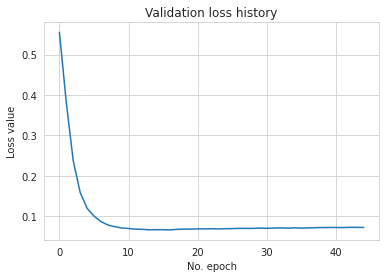

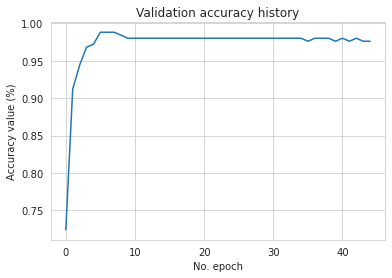

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history1.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history1.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [158]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       136
           1       0.99      0.96      0.97       114

    accuracy                           0.98       250
   macro avg       0.98      0.97      0.98       250
weighted avg       0.98      0.98      0.98       250



In [147]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# np.argmax(pred,axis=1)
# Cross-validate
# Use for StratifiedKFold classification
kf = StratifiedKFold(10, shuffle=True, random_state=0) 
    
oos_y = []
oos_pred = []
fold = 0
R2=[]
# Must specify y StratifiedKFold for
for train, test in kf.split(X_train,y_train):  
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = X_train[train]
    Y_train = y_train[train]
    x_test = X_train[test]
    Y_test = y_train[test]
    
    from tensorflow.keras.callbacks import EarlyStopping
    ann1 = tf.keras.models.Sequential()
    ann1.add(tf.keras.layers.Dense(units=7, activation='relu'))
    ann1.add(tf.keras.layers.Dense(units=7, activation='relu'))
    ann1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann1.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
    early_stop = EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=25)

    history = ann1.fit(x_train, Y_train, batch_size = 8, epochs = 200,validation_data=(x_test, Y_test),
          callbacks=[early_stop])
    
    pred = ann1.predict(x_test)
    pred = (pred > 0.5)
    oos_y.append(Y_test)
    # raw probabilities to chosen class (highest probability)

    oos_pred.append(pred)  

    # Measure this fold's accuracy
    from sklearn.metrics import confusion_matrix, accuracy_score

    score = accuracy_score(Y_test, pred)
    print(f"Fold score (accuracy): ",score)
    R2.append(score)

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
from sklearn.metrics import confusion_matrix, accuracy_score

score = accuracy_score(oos_y, oos_pred)
print(f"Final score (accuracy): {score}")    
    
# Write the cross-validated prediction (from the last neural network)
holdout_pred = ann1.predict(X_test)
holdout_pred = (holdout_pred > 0.5)
r2 = accuracy_score(y_test,holdout_pred)
print(f"Holdout score (Accuracy): {r2}")


Fold #1
Epoch 1/200
85/85 [==============================] - 2s 10ms/step - loss: 0.6875 - accuracy: 0.5496 - val_loss: 0.6289 - val_accuracy: 0.7067
Epoch 2/200
85/85 [==============================] - 0s 4ms/step - loss: 0.5288 - accuracy: 0.8652 - val_loss: 0.4619 - val_accuracy: 0.9333
Epoch 3/200
85/85 [==============================] - 0s 4ms/step - loss: 0.3743 - accuracy: 0.9319 - val_loss: 0.3133 - val_accuracy: 0.9333
Epoch 4/200
85/85 [==============================] - 0s 3ms/step - loss: 0.2587 - accuracy: 0.9481 - val_loss: 0.2225 - val_accuracy: 0.9467
Epoch 5/200
85/85 [==============================] - 0s 3ms/step - loss: 0.1920 - accuracy: 0.9511 - val_loss: 0.1740 - val_accuracy: 0.9467
Epoch 6/200
85/85 [==============================] - 0s 3ms/step - loss: 0.1555 - accuracy: 0.9570 - val_loss: 0.1451 - val_accuracy: 0.9733
Epoch 7/200
85/85 [==============================] - 0s 3ms/step - loss: 0.1352 - accuracy: 0.9585 - val_loss: 0.1286 - val_accuracy: 0.9733
Epoc

Epoch 74/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.9793 - val_loss: 0.1003 - val_accuracy: 0.9733
Epoch 75/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0819 - accuracy: 0.9763 - val_loss: 0.0986 - val_accuracy: 0.9733
Epoch 76/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0814 - accuracy: 0.9778 - val_loss: 0.0989 - val_accuracy: 0.9733
Epoch 77/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0813 - accuracy: 0.9778 - val_loss: 0.0997 - val_accuracy: 0.9733
Epoch 78/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 0.9778 - val_loss: 0.1000 - val_accuracy: 0.9733
Epoch 79/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0810 - accuracy: 0.9778 - val_loss: 0.0985 - val_accuracy: 0.9733
Epoch 00079: early stopping
Fold score (accuracy):  0.9733333333333334
Fold #3
Epoch 1/200
85/85 [==============================] - 1s 5ms/step - lo

85/85 [==============================] - 1s 5ms/step - loss: 0.6042 - accuracy: 0.5600 - val_loss: 0.5353 - val_accuracy: 0.6933
Epoch 2/200
85/85 [==============================] - 0s 3ms/step - loss: 0.4583 - accuracy: 0.8741 - val_loss: 0.3551 - val_accuracy: 0.8800
Epoch 3/200
85/85 [==============================] - 0s 3ms/step - loss: 0.2949 - accuracy: 0.9333 - val_loss: 0.2314 - val_accuracy: 0.9200
Epoch 4/200
85/85 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9393 - val_loss: 0.1755 - val_accuracy: 0.9200
Epoch 5/200
85/85 [==============================] - 0s 3ms/step - loss: 0.1637 - accuracy: 0.9422 - val_loss: 0.1464 - val_accuracy: 0.9333
Epoch 6/200
85/85 [==============================] - 0s 3ms/step - loss: 0.1436 - accuracy: 0.9481 - val_loss: 0.1278 - val_accuracy: 0.9333
Epoch 7/200
85/85 [==============================] - 0s 3ms/step - loss: 0.1312 - accuracy: 0.9526 - val_loss: 0.1161 - val_accuracy: 0.9467
Epoch 8/200
85/85 [======

Epoch 59/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0901 - accuracy: 0.9704 - val_loss: 0.0577 - val_accuracy: 0.9733
Epoch 60/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.9719 - val_loss: 0.0591 - val_accuracy: 0.9733
Epoch 61/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0899 - accuracy: 0.9704 - val_loss: 0.0597 - val_accuracy: 0.9733
Epoch 62/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0893 - accuracy: 0.9733 - val_loss: 0.0578 - val_accuracy: 0.9733
Epoch 63/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0897 - accuracy: 0.9704 - val_loss: 0.0578 - val_accuracy: 0.9733
Epoch 64/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.9733 - val_loss: 0.0589 - val_accuracy: 0.9733
Epoch 65/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.9748 - val_loss: 0.0579 - val_accuracy: 0.9733
Epoch 

85/85 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.9748 - val_loss: 0.3239 - val_accuracy: 0.9067
Epoch 44/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9733 - val_loss: 0.3244 - val_accuracy: 0.9067
Epoch 45/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9748 - val_loss: 0.3234 - val_accuracy: 0.9067
Epoch 46/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0707 - accuracy: 0.9748 - val_loss: 0.3284 - val_accuracy: 0.9067
Epoch 47/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9748 - val_loss: 0.3292 - val_accuracy: 0.9067
Epoch 48/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9763 - val_loss: 0.3324 - val_accuracy: 0.9067
Epoch 49/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0702 - accuracy: 0.9763 - val_loss: 0.3327 - val_accuracy: 0.9067
Epoch 50/200
85/85 

85/85 [==============================] - 0s 3ms/step - loss: 0.0918 - accuracy: 0.9719 - val_loss: 0.0944 - val_accuracy: 0.9733
Epoch 28/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0914 - accuracy: 0.9719 - val_loss: 0.0950 - val_accuracy: 0.9733
Epoch 29/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0911 - accuracy: 0.9748 - val_loss: 0.0952 - val_accuracy: 0.9733
Epoch 30/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0906 - accuracy: 0.9733 - val_loss: 0.0953 - val_accuracy: 0.9733
Epoch 31/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0905 - accuracy: 0.9733 - val_loss: 0.0957 - val_accuracy: 0.9733
Epoch 32/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0903 - accuracy: 0.9719 - val_loss: 0.0965 - val_accuracy: 0.9733
Epoch 33/200
85/85 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.9733 - val_loss: 0.0950 - val_accuracy: 0.9733
Epoch 34/200
85/85 

Epoch 2/200
85/85 [==============================] - 0s 3ms/step - loss: 0.2567 - accuracy: 0.9407 - val_loss: 0.1867 - val_accuracy: 0.9733
Epoch 3/200
85/85 [==============================] - 0s 3ms/step - loss: 0.1729 - accuracy: 0.9511 - val_loss: 0.1325 - val_accuracy: 0.9867
Epoch 4/200
85/85 [==============================] - 0s 3ms/step - loss: 0.1383 - accuracy: 0.9585 - val_loss: 0.1096 - val_accuracy: 0.9867
Epoch 5/200
85/85 [==============================] - 0s 3ms/step - loss: 0.1211 - accuracy: 0.9630 - val_loss: 0.1027 - val_accuracy: 0.9600
Epoch 6/200
85/85 [==============================] - 0s 3ms/step - loss: 0.1123 - accuracy: 0.9674 - val_loss: 0.0999 - val_accuracy: 0.9600
Epoch 7/200
85/85 [==============================] - 0s 3ms/step - loss: 0.1068 - accuracy: 0.9689 - val_loss: 0.0977 - val_accuracy: 0.9600
Epoch 8/200
85/85 [==============================] - 0s 3ms/step - loss: 0.1033 - accuracy: 0.9689 - val_loss: 0.0988 - val_accuracy: 0.9467
Epoch 9/200
8

Epoch 60/200
85/85 [==============================] - 0s 3ms/step - loss: 0.0887 - accuracy: 0.9733 - val_loss: 0.1242 - val_accuracy: 0.9333
Epoch 00060: early stopping
Fold score (accuracy):  0.9333333333333333
Final score (accuracy): 0.964
Holdout score (Accuracy): 0.972


In [148]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, holdout_pred)
print(cm)
accuracy_score(y_test, holdout_pred)

[[134   2]
 [  5 109]]


0.972

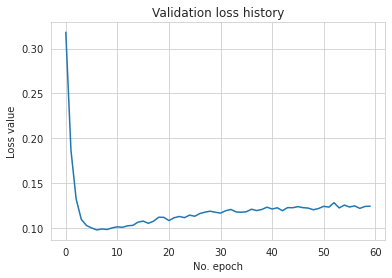

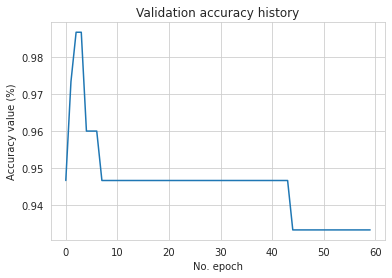

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [110]:
mean=sum(R2)/len(R2)

In [111]:
variance = sum([((x - mean) ** 2) for x in R2]) / len(R2) 
res = variance ** 0.5

In [115]:
mean*100

96.13333333333334

In [114]:
res*100

2.4184476196289424